In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version uses the pytorch framework which allows GPU acceleration if available
# this update turns on CUDA GPU mode
# (c) Tariq Rashid, 2017
# license is GPLv2

In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn

import numpy

In [5]:
class NeuralNetwork(nn.Module):

    def __init__(self, inodes, hnodes, onodes, learning_rate):
        # call the base class's initialisation too
        super().__init__()
        
        # dimensions
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        self.lr = learning_rate
        
        # define the layers and their sizes, turn off bias
        self.linear_ih = nn.Linear(inodes, hnodes, bias=False)
        self.dropout = nn.Dropout(0.1) 
        self.linear_ih = nn.Linear(inodes, hnodes, bias=False)
        self.linear_ho = nn.Linear(hnodes, onodes, bias=False)
        
        # define activation function
        self.activation = nn.Sigmoid()
        
        # create error function
        self.error_function = torch.nn.MSELoss(size_average=False)

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), self.lr)

        pass

    
    def forward(self, inputs_list):
        # convert list to a 2-D FloatTensor then wrap in Variable 
        # also shift to GPU, remove .cuda. if not desired
        inputs = Variable(torch.FloatTensor(inputs_list).view(1, self.inodes))
        
        # combine input layer signals into hidden layer
        hidden_inputs = self.linear_ih(inputs)
        # apply sigmiod activation function
        hidden_outputs = self.activation(hidden_inputs)
        
        # combine hidden layer signals into output layer
        final_inputs = self.linear_ho(hidden_outputs)
        # apply sigmiod activation function
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

    
    def train(self, inputs_list, targets_list):
        # calculate the output of the network
        output = self.forward(inputs_list)

        # create a Variable out of the target vector, doesn't need gradients calculated
        # also shift to GPU, remove .cuda. if not desired
        target_variable = Variable(torch.FloatTensor(targets_list).view(1, self.onodes), requires_grad=False)
        
        # calculate error
        loss = self.error_function(output, target_variable)
        
        print("Loss: " + str(loss))

        # zero gradients, perform a backward pass, and update the weights.
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass

    pass

In [6]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# move neural network to the GPU, delete if not desired
# n.cuda()

In [7]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [8]:
# %%timeit -n1 -r1 -c

# train the neural network

epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    first = 1
    for record in training_data_list:
        if first == 1:
            first = 0
            continue
            
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


Loss: tensor(2.4066, grad_fn=<MseLossBackward>)
Loss: tensor(1.5830, grad_fn=<MseLossBackward>)
Loss: tensor(1.3958, grad_fn=<MseLossBackward>)
Loss: tensor(1.0597, grad_fn=<MseLossBackward>)
Loss: tensor(1.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.9645, grad_fn=<MseLossBackward>)
Loss: tensor(0.8518, grad_fn=<MseLossBackward>)
Loss: tensor(1.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.7178, grad_fn=<MseLossBackward>)
Loss: tensor(1.0828, grad_fn=<MseLossBackward>)
Loss: tensor(0.8685, grad_fn=<MseLossBackward>)
Loss: tensor(0.9744, grad_fn=<MseLossBackward>)
Loss: tensor(0.7338, grad_fn=<MseLossBackward>)
Loss: tensor(1.0761, grad_fn=<MseLossBackward>)
Loss: tensor(0.8641, grad_fn=<MseLossBackward>)
Loss: tensor(0.9632, grad_fn=<MseLossBackward>)
Loss: tensor(0.9169, grad_fn=<MseLossBackward>)
Loss: tensor(0.9403, grad_fn=<MseLossBackward>)
Loss: tensor(0.8815, grad_fn=<MseLossBackward>)
Loss: tensor(0.9313, grad_fn=<MseLossBackward>)
Loss: tensor(0.9033, grad_fn=<MseLossBac

Loss: tensor(1.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.9135, grad_fn=<MseLossBackward>)
Loss: tensor(0.9023, grad_fn=<MseLossBackward>)
Loss: tensor(0.9065, grad_fn=<MseLossBackward>)
Loss: tensor(0.9336, grad_fn=<MseLossBackward>)
Loss: tensor(0.8359, grad_fn=<MseLossBackward>)
Loss: tensor(0.8463, grad_fn=<MseLossBackward>)
Loss: tensor(0.8862, grad_fn=<MseLossBackward>)
Loss: tensor(0.8952, grad_fn=<MseLossBackward>)
Loss: tensor(0.9039, grad_fn=<MseLossBackward>)
Loss: tensor(0.8806, grad_fn=<MseLossBackward>)
Loss: tensor(0.9276, grad_fn=<MseLossBackward>)
Loss: tensor(0.8858, grad_fn=<MseLossBackward>)
Loss: tensor(0.7273, grad_fn=<MseLossBackward>)
Loss: tensor(0.9100, grad_fn=<MseLossBackward>)
Loss: tensor(0.7882, grad_fn=<MseLossBackward>)
Loss: tensor(0.9875, grad_fn=<MseLossBackward>)
Loss: tensor(0.8686, grad_fn=<MseLossBackward>)
Loss: tensor(0.8507, grad_fn=<MseLossBackward>)
Loss: tensor(0.6349, grad_fn=<MseLossBackward>)
Loss: tensor(1.1026, grad_fn=<MseLossBac

Loss: tensor(0.9700, grad_fn=<MseLossBackward>)
Loss: tensor(0.9891, grad_fn=<MseLossBackward>)
Loss: tensor(0.7143, grad_fn=<MseLossBackward>)
Loss: tensor(1.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.9264, grad_fn=<MseLossBackward>)
Loss: tensor(0.8395, grad_fn=<MseLossBackward>)
Loss: tensor(0.9389, grad_fn=<MseLossBackward>)
Loss: tensor(0.8486, grad_fn=<MseLossBackward>)
Loss: tensor(0.9193, grad_fn=<MseLossBackward>)
Loss: tensor(0.9203, grad_fn=<MseLossBackward>)
Loss: tensor(0.8869, grad_fn=<MseLossBackward>)
Loss: tensor(0.8524, grad_fn=<MseLossBackward>)
Loss: tensor(0.7745, grad_fn=<MseLossBackward>)
Loss: tensor(0.8690, grad_fn=<MseLossBackward>)
Loss: tensor(0.6771, grad_fn=<MseLossBackward>)
Loss: tensor(0.3579, grad_fn=<MseLossBackward>)
Loss: tensor(1.0282, grad_fn=<MseLossBackward>)
Loss: tensor(0.1946, grad_fn=<MseLossBackward>)
Loss: tensor(1.1037, grad_fn=<MseLossBackward>)
Loss: tensor(0.8954, grad_fn=<MseLossBackward>)
Loss: tensor(0.7439, grad_fn=<MseLossBac

Loss: tensor(0.7445, grad_fn=<MseLossBackward>)
Loss: tensor(0.9679, grad_fn=<MseLossBackward>)
Loss: tensor(0.4339, grad_fn=<MseLossBackward>)
Loss: tensor(0.8388, grad_fn=<MseLossBackward>)
Loss: tensor(0.4924, grad_fn=<MseLossBackward>)
Loss: tensor(1.1437, grad_fn=<MseLossBackward>)
Loss: tensor(1.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.8347, grad_fn=<MseLossBackward>)
Loss: tensor(0.8857, grad_fn=<MseLossBackward>)
Loss: tensor(0.7150, grad_fn=<MseLossBackward>)
Loss: tensor(0.4176, grad_fn=<MseLossBackward>)
Loss: tensor(0.8581, grad_fn=<MseLossBackward>)
Loss: tensor(0.7954, grad_fn=<MseLossBackward>)
Loss: tensor(0.9815, grad_fn=<MseLossBackward>)
Loss: tensor(0.7274, grad_fn=<MseLossBackward>)
Loss: tensor(0.9171, grad_fn=<MseLossBackward>)
Loss: tensor(0.5013, grad_fn=<MseLossBackward>)
Loss: tensor(0.8860, grad_fn=<MseLossBackward>)
Loss: tensor(0.5983, grad_fn=<MseLossBackward>)
Loss: tensor(0.3747, grad_fn=<MseLossBackward>)
Loss: tensor(0.8653, grad_fn=<MseLossBac

Loss: tensor(0.8333, grad_fn=<MseLossBackward>)
Loss: tensor(0.9478, grad_fn=<MseLossBackward>)
Loss: tensor(0.7744, grad_fn=<MseLossBackward>)
Loss: tensor(0.6531, grad_fn=<MseLossBackward>)
Loss: tensor(0.6554, grad_fn=<MseLossBackward>)
Loss: tensor(0.5276, grad_fn=<MseLossBackward>)
Loss: tensor(0.4099, grad_fn=<MseLossBackward>)
Loss: tensor(0.1414, grad_fn=<MseLossBackward>)
Loss: tensor(1.1036, grad_fn=<MseLossBackward>)
Loss: tensor(0.8567, grad_fn=<MseLossBackward>)
Loss: tensor(0.6923, grad_fn=<MseLossBackward>)
Loss: tensor(0.6445, grad_fn=<MseLossBackward>)
Loss: tensor(0.7373, grad_fn=<MseLossBackward>)
Loss: tensor(0.1717, grad_fn=<MseLossBackward>)
Loss: tensor(0.8363, grad_fn=<MseLossBackward>)
Loss: tensor(0.2558, grad_fn=<MseLossBackward>)
Loss: tensor(0.9132, grad_fn=<MseLossBackward>)
Loss: tensor(0.8277, grad_fn=<MseLossBackward>)
Loss: tensor(0.9321, grad_fn=<MseLossBackward>)
Loss: tensor(0.8114, grad_fn=<MseLossBackward>)
Loss: tensor(0.4041, grad_fn=<MseLossBac

Loss: tensor(0.7620, grad_fn=<MseLossBackward>)
Loss: tensor(0.9414, grad_fn=<MseLossBackward>)
Loss: tensor(0.4233, grad_fn=<MseLossBackward>)
Loss: tensor(0.7755, grad_fn=<MseLossBackward>)
Loss: tensor(1.2270, grad_fn=<MseLossBackward>)
Loss: tensor(0.2586, grad_fn=<MseLossBackward>)
Loss: tensor(0.8516, grad_fn=<MseLossBackward>)
Loss: tensor(0.8921, grad_fn=<MseLossBackward>)
Loss: tensor(0.4949, grad_fn=<MseLossBackward>)
Loss: tensor(0.7011, grad_fn=<MseLossBackward>)
Loss: tensor(0.6810, grad_fn=<MseLossBackward>)
Loss: tensor(0.3101, grad_fn=<MseLossBackward>)
Loss: tensor(0.2824, grad_fn=<MseLossBackward>)
Loss: tensor(0.3011, grad_fn=<MseLossBackward>)
Loss: tensor(0.3917, grad_fn=<MseLossBackward>)
Loss: tensor(1.1452, grad_fn=<MseLossBackward>)
Loss: tensor(0.3820, grad_fn=<MseLossBackward>)
Loss: tensor(0.1013, grad_fn=<MseLossBackward>)
Loss: tensor(0.2945, grad_fn=<MseLossBackward>)
Loss: tensor(0.4750, grad_fn=<MseLossBackward>)
Loss: tensor(0.2840, grad_fn=<MseLossBac

Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.8028, grad_fn=<MseLossBackward>)
Loss: tensor(0.9254, grad_fn=<MseLossBackward>)
Loss: tensor(0.2518, grad_fn=<MseLossBackward>)
Loss: tensor(1.0984, grad_fn=<MseLossBackward>)
Loss: tensor(0.5237, grad_fn=<MseLossBackward>)
Loss: tensor(0.8396, grad_fn=<MseLossBackward>)
Loss: tensor(0.2900, grad_fn=<MseLossBackward>)
Loss: tensor(0.6557, grad_fn=<MseLossBackward>)
Loss: tensor(0.0486, grad_fn=<MseLossBackward>)
Loss: tensor(1.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.4907, grad_fn=<MseLossBackward>)
Loss: tensor(0.7340, grad_fn=<MseLossBackward>)
Loss: tensor(0.6122, grad_fn=<MseLossBackward>)
Loss: tensor(0.0241, grad_fn=<MseLossBackward>)
Loss: tensor(0.4730, grad_fn=<MseLossBackward>)
Loss: tensor(0.5764, grad_fn=<MseLossBackward>)
Loss: tensor(0.2650, grad_fn=<MseLossBackward>)
Loss: tensor(1.0325, grad_fn=<MseLossBackward>)
Loss: tensor(0.2283, grad_fn=<MseLossBackward>)
Loss: tensor(0.3048, grad_fn=<MseLossBac

Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0473, grad_fn=<MseLossBackward>)
Loss: tensor(0.7549, grad_fn=<MseLossBackward>)
Loss: tensor(0.3000, grad_fn=<MseLossBackward>)
Loss: tensor(0.4943, grad_fn=<MseLossBackward>)
Loss: tensor(0.3237, grad_fn=<MseLossBackward>)
Loss: tensor(0.2113, grad_fn=<MseLossBackward>)
Loss: tensor(0.4757, grad_fn=<MseLossBackward>)
Loss: tensor(0.7057, grad_fn=<MseLossBackward>)
Loss: tensor(0.8441, grad_fn=<MseLossBackward>)
Loss: tensor(0.9621, grad_fn=<MseLossBackward>)
Loss: tensor(0.1028, grad_fn=<MseLossBackward>)
Loss: tensor(0.9894, grad_fn=<MseLossBackward>)
Loss: tensor(0.0922, grad_fn=<MseLossBackward>)
Loss: tensor(1.3137, grad_fn=<MseLossBackward>)
Loss: tensor(0.2436, grad_fn=<MseLossBackward>)
Loss: tensor(0.9897, grad_fn=<MseLossBackward>)
Loss: tensor(0.4271, grad_fn=<MseLossBackward>)
Loss: tensor(0.0366, grad_fn=<MseLossBackward>)
Loss: tensor(0.0355, grad_fn=<MseLossBackward>)
Loss: tensor(0.0563, grad_fn=<MseLossBac

Loss: tensor(0.7966, grad_fn=<MseLossBackward>)
Loss: tensor(0.5960, grad_fn=<MseLossBackward>)
Loss: tensor(0.2344, grad_fn=<MseLossBackward>)
Loss: tensor(0.0279, grad_fn=<MseLossBackward>)
Loss: tensor(0.0378, grad_fn=<MseLossBackward>)
Loss: tensor(0.4237, grad_fn=<MseLossBackward>)
Loss: tensor(0.1664, grad_fn=<MseLossBackward>)
Loss: tensor(0.4313, grad_fn=<MseLossBackward>)
Loss: tensor(0.1453, grad_fn=<MseLossBackward>)
Loss: tensor(0.7936, grad_fn=<MseLossBackward>)
Loss: tensor(1.2549, grad_fn=<MseLossBackward>)
Loss: tensor(0.1057, grad_fn=<MseLossBackward>)
Loss: tensor(0.3362, grad_fn=<MseLossBackward>)
Loss: tensor(0.5477, grad_fn=<MseLossBackward>)
Loss: tensor(0.2157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0628, grad_fn=<MseLossBackward>)
Loss: tensor(0.3387, grad_fn=<MseLossBackward>)
Loss: tensor(0.1169, grad_fn=<MseLossBackward>)
Loss: tensor(0.1035, grad_fn=<MseLossBackward>)
Loss: tensor(0.7851, grad_fn=<MseLossBackward>)
Loss: tensor(0.8954, grad_fn=<MseLossBac

Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(0.8386, grad_fn=<MseLossBackward>)
Loss: tensor(0.0727, grad_fn=<MseLossBackward>)
Loss: tensor(0.0445, grad_fn=<MseLossBackward>)
Loss: tensor(0.0477, grad_fn=<MseLossBackward>)
Loss: tensor(1.1388, grad_fn=<MseLossBackward>)
Loss: tensor(0.0619, grad_fn=<MseLossBackward>)
Loss: tensor(0.7703, grad_fn=<MseLossBackward>)
Loss: tensor(0.0318, grad_fn=<MseLossBackward>)
Loss: tensor(0.6499, grad_fn=<MseLossBackward>)
Loss: tensor(0.0690, grad_fn=<MseLossBackward>)
Loss: tensor(0.3230, grad_fn=<MseLossBackward>)
Loss: tensor(0.3436, grad_fn=<MseLossBackward>)
Loss: tensor(0.4682, grad_fn=<MseLossBackward>)
Loss: tensor(0.3444, grad_fn=<MseLossBackward>)
Loss: tensor(0.8683, grad_fn=<MseLossBackward>)
Loss: tensor(0.2220, grad_fn=<MseLossBackward>)
Loss: tensor(0.4852, grad_fn=<MseLossBackward>)
Loss: tensor(0.0666, grad_fn=<MseLossBackward>)
Loss: tensor(1.0948, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBac

Loss: tensor(0.0944, grad_fn=<MseLossBackward>)
Loss: tensor(0.0429, grad_fn=<MseLossBackward>)
Loss: tensor(1.0642, grad_fn=<MseLossBackward>)
Loss: tensor(0.4453, grad_fn=<MseLossBackward>)
Loss: tensor(0.8941, grad_fn=<MseLossBackward>)
Loss: tensor(0.0974, grad_fn=<MseLossBackward>)
Loss: tensor(0.1308, grad_fn=<MseLossBackward>)
Loss: tensor(0.1471, grad_fn=<MseLossBackward>)
Loss: tensor(0.0700, grad_fn=<MseLossBackward>)
Loss: tensor(0.0274, grad_fn=<MseLossBackward>)
Loss: tensor(0.0733, grad_fn=<MseLossBackward>)
Loss: tensor(0.0378, grad_fn=<MseLossBackward>)
Loss: tensor(0.1801, grad_fn=<MseLossBackward>)
Loss: tensor(0.0355, grad_fn=<MseLossBackward>)
Loss: tensor(0.0302, grad_fn=<MseLossBackward>)
Loss: tensor(0.0141, grad_fn=<MseLossBackward>)
Loss: tensor(0.0322, grad_fn=<MseLossBackward>)
Loss: tensor(0.7089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0172, grad_fn=<MseLossBackward>)
Loss: tensor(0.0323, grad_fn=<MseLossBackward>)
Loss: tensor(1.0968, grad_fn=<MseLossBac

Loss: tensor(0.0612, grad_fn=<MseLossBackward>)
Loss: tensor(0.0184, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.1014, grad_fn=<MseLossBackward>)
Loss: tensor(0.5410, grad_fn=<MseLossBackward>)
Loss: tensor(0.0999, grad_fn=<MseLossBackward>)
Loss: tensor(0.3093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0481, grad_fn=<MseLossBackward>)
Loss: tensor(0.0283, grad_fn=<MseLossBackward>)
Loss: tensor(0.2557, grad_fn=<MseLossBackward>)
Loss: tensor(0.2166, grad_fn=<MseLossBackward>)
Loss: tensor(0.1930, grad_fn=<MseLossBackward>)
Loss: tensor(0.0330, grad_fn=<MseLossBackward>)
Loss: tensor(0.3198, grad_fn=<MseLossBackward>)
Loss: tensor(0.0360, grad_fn=<MseLossBackward>)
Loss: tensor(0.0434, grad_fn=<MseLossBackward>)
Loss: tensor(0.2408, grad_fn=<MseLossBackward>)
Loss: tensor(0.8356, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0306, grad_fn=<MseLossBac

Loss: tensor(0.2942, grad_fn=<MseLossBackward>)
Loss: tensor(0.4527, grad_fn=<MseLossBackward>)
Loss: tensor(0.0272, grad_fn=<MseLossBackward>)
Loss: tensor(1.5896, grad_fn=<MseLossBackward>)
Loss: tensor(0.1710, grad_fn=<MseLossBackward>)
Loss: tensor(0.0818, grad_fn=<MseLossBackward>)
Loss: tensor(0.0723, grad_fn=<MseLossBackward>)
Loss: tensor(0.3090, grad_fn=<MseLossBackward>)
Loss: tensor(0.1286, grad_fn=<MseLossBackward>)
Loss: tensor(1.1744, grad_fn=<MseLossBackward>)
Loss: tensor(0.1169, grad_fn=<MseLossBackward>)
Loss: tensor(0.0690, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0129, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0300, grad_fn=<MseLossBackward>)
Loss: tensor(0.0462, grad_fn=<MseLossBackward>)
Loss: tensor(0.8940, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0423, grad_fn=<MseLossBac

Loss: tensor(0.0419, grad_fn=<MseLossBackward>)
Loss: tensor(0.0133, grad_fn=<MseLossBackward>)
Loss: tensor(0.0556, grad_fn=<MseLossBackward>)
Loss: tensor(0.1808, grad_fn=<MseLossBackward>)
Loss: tensor(0.0595, grad_fn=<MseLossBackward>)
Loss: tensor(0.0253, grad_fn=<MseLossBackward>)
Loss: tensor(0.9078, grad_fn=<MseLossBackward>)
Loss: tensor(1.0972, grad_fn=<MseLossBackward>)
Loss: tensor(0.0228, grad_fn=<MseLossBackward>)
Loss: tensor(0.0737, grad_fn=<MseLossBackward>)
Loss: tensor(0.2072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0199, grad_fn=<MseLossBackward>)
Loss: tensor(1.1493, grad_fn=<MseLossBackward>)
Loss: tensor(1.1438, grad_fn=<MseLossBackward>)
Loss: tensor(0.1805, grad_fn=<MseLossBackward>)
Loss: tensor(0.0105, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.2425, grad_fn=<MseLossBackward>)
Loss: tensor(0.0677, grad_fn=<MseLossBac

Loss: tensor(0.0755, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0423, grad_fn=<MseLossBackward>)
Loss: tensor(0.2874, grad_fn=<MseLossBackward>)
Loss: tensor(0.3137, grad_fn=<MseLossBackward>)
Loss: tensor(0.9995, grad_fn=<MseLossBackward>)
Loss: tensor(0.1731, grad_fn=<MseLossBackward>)
Loss: tensor(0.1520, grad_fn=<MseLossBackward>)
Loss: tensor(0.1942, grad_fn=<MseLossBackward>)
Loss: tensor(0.1809, grad_fn=<MseLossBackward>)
Loss: tensor(0.4545, grad_fn=<MseLossBackward>)
Loss: tensor(0.3495, grad_fn=<MseLossBackward>)
Loss: tensor(0.0492, grad_fn=<MseLossBackward>)
Loss: tensor(0.0641, grad_fn=<MseLossBackward>)
Loss: tensor(0.1344, grad_fn=<MseLossBackward>)
Loss: tensor(0.0885, grad_fn=<MseLossBackward>)
Loss: tensor(0.0195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0462, grad_fn=<MseLossBackward>)
Loss: tensor(0.0293, grad_fn=<MseLossBackward>)
Loss: tensor(0.6299, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0551, grad_fn=<MseLossBackward>)
Loss: tensor(0.4411, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.2666, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.7038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0765, grad_fn=<MseLossBackward>)
Loss: tensor(0.0965, grad_fn=<MseLossBackward>)
Loss: tensor(0.0244, grad_fn=<MseLossBackward>)
Loss: tensor(0.0497, grad_fn=<MseLossBackward>)
Loss: tensor(0.3087, grad_fn=<MseLossBackward>)
Loss: tensor(0.5749, grad_fn=<MseLossBackward>)
Loss: tensor(0.0120, grad_fn=<MseLossBackward>)
Loss: tensor(0.4067, grad_fn=<MseLossBackward>)
Loss: tensor(0.3042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0637, grad_fn=<MseLossBackward>)
Loss: tensor(0.0292, grad_fn=<MseLossBackward>)
Loss: tensor(0.2521, grad_fn=<MseLossBackward>)
Loss: tensor(0.0674, grad_fn=<MseLossBac

Loss: tensor(0.0129, grad_fn=<MseLossBackward>)
Loss: tensor(0.0288, grad_fn=<MseLossBackward>)
Loss: tensor(0.1037, grad_fn=<MseLossBackward>)
Loss: tensor(0.9341, grad_fn=<MseLossBackward>)
Loss: tensor(0.0510, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(2.3921, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.3542, grad_fn=<MseLossBackward>)
Loss: tensor(0.0236, grad_fn=<MseLossBackward>)
Loss: tensor(0.0518, grad_fn=<MseLossBackward>)
Loss: tensor(0.0825, grad_fn=<MseLossBackward>)
Loss: tensor(0.9085, grad_fn=<MseLossBackward>)
Loss: tensor(0.0100, grad_fn=<MseLossBackward>)
Loss: tensor(0.4851, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0454, grad_fn=<MseLossBackward>)
Loss: tensor(0.0195, grad_fn=<MseLossBackward>)
Loss: tensor(0.6082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBac

Loss: tensor(0.0295, grad_fn=<MseLossBackward>)
Loss: tensor(0.0366, grad_fn=<MseLossBackward>)
Loss: tensor(0.1278, grad_fn=<MseLossBackward>)
Loss: tensor(0.0621, grad_fn=<MseLossBackward>)
Loss: tensor(0.2214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0732, grad_fn=<MseLossBackward>)
Loss: tensor(0.0958, grad_fn=<MseLossBackward>)
Loss: tensor(0.8925, grad_fn=<MseLossBackward>)
Loss: tensor(0.3846, grad_fn=<MseLossBackward>)
Loss: tensor(0.3179, grad_fn=<MseLossBackward>)
Loss: tensor(0.1476, grad_fn=<MseLossBackward>)
Loss: tensor(0.4474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.5418, grad_fn=<MseLossBackward>)
Loss: tensor(0.6339, grad_fn=<MseLossBackward>)
Loss: tensor(0.2639, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.2487, grad_fn=<MseLossBackward>)
Loss: tensor(0.3649, grad_fn=<MseLossBackward>)
Loss: tensor(0.2362, grad_fn=<MseLossBac

Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.4055, grad_fn=<MseLossBackward>)
Loss: tensor(0.1093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0249, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0381, grad_fn=<MseLossBackward>)
Loss: tensor(0.4154, grad_fn=<MseLossBackward>)
Loss: tensor(0.5794, grad_fn=<MseLossBackward>)
Loss: tensor(0.0147, grad_fn=<MseLossBackward>)
Loss: tensor(0.3324, grad_fn=<MseLossBackward>)
Loss: tensor(0.0605, grad_fn=<MseLossBackward>)
Loss: tensor(0.0334, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0868, grad_fn=<MseLossBackward>)
Loss: tensor(1.3101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0307, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0224, grad_fn=<MseLossBackward>)
Loss: tensor(0.3872, grad_fn=<MseLossBackward>)
Loss: tensor(0.0446, grad_fn=<MseLossBac

Loss: tensor(0.3984, grad_fn=<MseLossBackward>)
Loss: tensor(0.0891, grad_fn=<MseLossBackward>)
Loss: tensor(0.2461, grad_fn=<MseLossBackward>)
Loss: tensor(0.2647, grad_fn=<MseLossBackward>)
Loss: tensor(0.8029, grad_fn=<MseLossBackward>)
Loss: tensor(0.1342, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.1529, grad_fn=<MseLossBackward>)
Loss: tensor(0.1598, grad_fn=<MseLossBackward>)
Loss: tensor(0.0275, grad_fn=<MseLossBackward>)
Loss: tensor(0.9235, grad_fn=<MseLossBackward>)
Loss: tensor(0.0736, grad_fn=<MseLossBackward>)
Loss: tensor(0.6819, grad_fn=<MseLossBackward>)
Loss: tensor(0.0182, grad_fn=<MseLossBackward>)
Loss: tensor(0.0123, grad_fn=<MseLossBackward>)
Loss: tensor(0.2073, grad_fn=<MseLossBackward>)
Loss: tensor(0.1402, grad_fn=<MseLossBackward>)
Loss: tensor(1.1084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0539, grad_fn=<MseLossBackward>)
Loss: tensor(0.0876, grad_fn=<MseLossBac

Loss: tensor(0.0164, grad_fn=<MseLossBackward>)
Loss: tensor(0.4190, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0349, grad_fn=<MseLossBackward>)
Loss: tensor(0.2478, grad_fn=<MseLossBackward>)
Loss: tensor(0.0174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0430, grad_fn=<MseLossBackward>)
Loss: tensor(0.3386, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.2720, grad_fn=<MseLossBackward>)
Loss: tensor(0.0367, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0100, grad_fn=<MseLossBackward>)
Loss: tensor(0.0214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.1450, grad_fn=<MseLossBackward>)
Loss: tensor(0.0274, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0601, grad_fn=<MseLossBackward>)
Loss: tensor(0.0363, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBac

Loss: tensor(0.5833, grad_fn=<MseLossBackward>)
Loss: tensor(0.1453, grad_fn=<MseLossBackward>)
Loss: tensor(0.3788, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0136, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.3751, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0193, grad_fn=<MseLossBackward>)
Loss: tensor(0.0493, grad_fn=<MseLossBackward>)
Loss: tensor(1.5120, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.5863, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0123, grad_fn=<MseLossBackward>)
Loss: tensor(1.0252, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.3845, grad_fn=<MseLossBac

Loss: tensor(0.0780, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBackward>)
Loss: tensor(0.0165, grad_fn=<MseLossBackward>)
Loss: tensor(0.0857, grad_fn=<MseLossBackward>)
Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.3279, grad_fn=<MseLossBackward>)
Loss: tensor(0.0246, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0311, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.2116, grad_fn=<MseLossBackward>)
Loss: tensor(0.0863, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(1.5614, grad_fn=<MseLossBackward>)
Loss: tensor(0.1871, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.1768, grad_fn=<MseLossBac

Loss: tensor(0.5242, grad_fn=<MseLossBackward>)
Loss: tensor(0.2223, grad_fn=<MseLossBackward>)
Loss: tensor(0.2697, grad_fn=<MseLossBackward>)
Loss: tensor(0.0736, grad_fn=<MseLossBackward>)
Loss: tensor(0.0911, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.9007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0224, grad_fn=<MseLossBackward>)
Loss: tensor(1.3048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0453, grad_fn=<MseLossBackward>)
Loss: tensor(0.0825, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0146, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0777, grad_fn=<MseLossBackward>)
Loss: tensor(0.0443, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.7588, grad_fn=<MseLossBackward>)
Loss: tensor(0.0785, grad_fn=<MseLossBackward>)
Loss: tensor(0.4903, grad_fn=<MseLossBac

Loss: tensor(1.2258, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0122, grad_fn=<MseLossBackward>)
Loss: tensor(0.1877, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.3327, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.6316, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0759, grad_fn=<MseLossBackward>)
Loss: tensor(0.0533, grad_fn=<MseLossBac

Loss: tensor(0.1319, grad_fn=<MseLossBackward>)
Loss: tensor(0.0368, grad_fn=<MseLossBackward>)
Loss: tensor(0.0153, grad_fn=<MseLossBackward>)
Loss: tensor(1.0524, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.1854, grad_fn=<MseLossBackward>)
Loss: tensor(0.0127, grad_fn=<MseLossBackward>)
Loss: tensor(0.0320, grad_fn=<MseLossBackward>)
Loss: tensor(0.0569, grad_fn=<MseLossBackward>)
Loss: tensor(0.7626, grad_fn=<MseLossBackward>)
Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(1.7604, grad_fn=<MseLossBackward>)
Loss: tensor(0.1301, grad_fn=<MseLossBackward>)
Loss: tensor(1.0773, grad_fn=<MseLossBackward>)
Loss: tensor(0.0608, grad_fn=<MseLossBackward>)
Loss: tensor(0.4338, grad_fn=<MseLossBackward>)
Loss: tensor(0.1540, grad_fn=<MseLossBac

Loss: tensor(0.4234, grad_fn=<MseLossBackward>)
Loss: tensor(0.0669, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0413, grad_fn=<MseLossBackward>)
Loss: tensor(1.6939, grad_fn=<MseLossBackward>)
Loss: tensor(1.6004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.7458, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2613, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0206, grad_fn=<MseLossBackward>)
Loss: tensor(0.0726, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.1941, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.5687, grad_fn=<MseLossBackward>)
Loss: tensor(0.1109, grad_fn=<MseLossBackward>)
Loss: tensor(0.0535, grad_fn=<MseLossBackward>)
Loss: tensor(0.1224, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.2424, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0513, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0505, grad_fn=<MseLossBackward>)
Loss: tensor(0.6071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.9636, grad_fn=<MseLossBackward>)
Loss: tensor(0.0248, grad_fn=<MseLossBackward>)
Loss: tensor(0.0675, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.3166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.1719, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4349, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0611, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.3014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1912, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0278, grad_fn=<MseLossBackward>)
Loss: tensor(0.1098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0267, grad_fn=<MseLossBackward>)
Loss: tensor(0.3340, grad_fn=<MseLossBackward>)
Loss: tensor(0.0341, grad_fn=<MseLossBackward>)
Loss: tensor(0.0760, grad_fn=<MseLossBackward>)
Loss: tensor(0.9382, grad_fn=<MseLossBac

Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.2950, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0387, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0789, grad_fn=<MseLossBackward>)
Loss: tensor(0.1524, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0450, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0417, grad_fn=<MseLossBackward>)
Loss: tensor(0.9366, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.6439, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBac

Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.0147, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.1427, grad_fn=<MseLossBackward>)
Loss: tensor(0.0123, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.8488, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0771, grad_fn=<MseLossBackward>)
Loss: tensor(0.0361, grad_fn=<MseLossBackward>)
Loss: tensor(0.0297, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0277, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(1.0723, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0229, grad_fn=<MseLossBackward>)
Loss: tensor(0.0306, grad_fn=<MseLossBac

Loss: tensor(0.0822, grad_fn=<MseLossBackward>)
Loss: tensor(0.0446, grad_fn=<MseLossBackward>)
Loss: tensor(0.9700, grad_fn=<MseLossBackward>)
Loss: tensor(0.0495, grad_fn=<MseLossBackward>)
Loss: tensor(0.1420, grad_fn=<MseLossBackward>)
Loss: tensor(0.0448, grad_fn=<MseLossBackward>)
Loss: tensor(0.8041, grad_fn=<MseLossBackward>)
Loss: tensor(0.3356, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.9427, grad_fn=<MseLossBackward>)
Loss: tensor(0.1521, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0741, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.3259, grad_fn=<MseLossBackward>)
Loss: tensor(0.2481, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.2088, grad_fn=<MseLossBackward>)
Loss: tensor(0.1139, grad_fn=<MseLossBac

Loss: tensor(0.1152, grad_fn=<MseLossBackward>)
Loss: tensor(0.8337, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.6711, grad_fn=<MseLossBackward>)
Loss: tensor(0.9235, grad_fn=<MseLossBackward>)
Loss: tensor(1.0369, grad_fn=<MseLossBackward>)
Loss: tensor(0.6124, grad_fn=<MseLossBackward>)
Loss: tensor(0.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(1.9642, grad_fn=<MseLossBackward>)
Loss: tensor(0.4914, grad_fn=<MseLossBackward>)
Loss: tensor(0.0100, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.4314, grad_fn=<MseLossBackward>)
Loss: tensor(0.8987, grad_fn=<MseLossBackward>)
Loss: tensor(0.2483, grad_fn=<MseLossBackward>)
Loss: tensor(0.2475, grad_fn=<MseLossBackward>)
Loss: tensor(0.2474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0843, grad_fn=<MseLossBackward>)
Loss: tensor(0.8293, grad_fn=<MseLossBac

Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.2400, grad_fn=<MseLossBackward>)
Loss: tensor(0.0173, grad_fn=<MseLossBackward>)
Loss: tensor(0.0694, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0325, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.5578, grad_fn=<MseLossBackward>)
Loss: tensor(0.9673, grad_fn=<MseLossBackward>)
Loss: tensor(0.6116, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0305, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0595, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBac

Loss: tensor(0.1992, grad_fn=<MseLossBackward>)
Loss: tensor(0.8376, grad_fn=<MseLossBackward>)
Loss: tensor(0.9959, grad_fn=<MseLossBackward>)
Loss: tensor(0.0353, grad_fn=<MseLossBackward>)
Loss: tensor(0.2227, grad_fn=<MseLossBackward>)
Loss: tensor(0.5254, grad_fn=<MseLossBackward>)
Loss: tensor(0.0218, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.8526, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2503, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.1265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.3304, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.1954, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBac

Loss: tensor(1.4980, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0107, grad_fn=<MseLossBackward>)
Loss: tensor(0.0318, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3876, grad_fn=<MseLossBackward>)
Loss: tensor(1.7145, grad_fn=<MseLossBackward>)
Loss: tensor(0.2828, grad_fn=<MseLossBackward>)
Loss: tensor(0.0719, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0153, grad_fn=<MseLossBackward>)
Loss: tensor(0.8775, grad_fn=<MseLossBackward>)
Loss: tensor(0.0422, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.8003, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.1168, grad_fn=<MseLossBac

Loss: tensor(0.7411, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.5558, grad_fn=<MseLossBackward>)
Loss: tensor(0.2639, grad_fn=<MseLossBackward>)
Loss: tensor(1.1823, grad_fn=<MseLossBackward>)
Loss: tensor(0.3084, grad_fn=<MseLossBackward>)
Loss: tensor(0.3294, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1884, grad_fn=<MseLossBackward>)
Loss: tensor(0.0192, grad_fn=<MseLossBackward>)
Loss: tensor(0.0149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0366, grad_fn=<MseLossBackward>)
Loss: tensor(0.1124, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0880, grad_fn=<MseLossBackward>)
Loss: tensor(0.0249, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3932, grad_fn=<MseLossBac

Loss: tensor(0.0267, grad_fn=<MseLossBackward>)
Loss: tensor(0.3230, grad_fn=<MseLossBackward>)
Loss: tensor(0.0198, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0480, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0357, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.4232, grad_fn=<MseLossBackward>)
Loss: tensor(1.0952, grad_fn=<MseLossBackward>)
Loss: tensor(0.1478, grad_fn=<MseLossBackward>)
Loss: tensor(1.0136, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.7434, grad_fn=<MseLossBackward>)
Loss: tensor(0.6228, grad_fn=<MseLossBackward>)
Loss: tensor(0.5813, grad_fn=<MseLossBackward>)
Loss: tensor(0.1695, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.1201, grad_fn=<MseLossBac

Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0127, grad_fn=<MseLossBackward>)
Loss: tensor(0.1224, grad_fn=<MseLossBackward>)
Loss: tensor(0.6029, grad_fn=<MseLossBackward>)
Loss: tensor(0.3397, grad_fn=<MseLossBackward>)
Loss: tensor(0.2336, grad_fn=<MseLossBackward>)
Loss: tensor(0.7694, grad_fn=<MseLossBackward>)
Loss: tensor(0.0209, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0831, grad_fn=<MseLossBackward>)
Loss: tensor(0.8682, grad_fn=<MseLossBackward>)
Loss: tensor(0.0233, grad_fn=<MseLossBackward>)
Loss: tensor(0.3709, grad_fn=<MseLossBackward>)
Loss: tensor(0.1732, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0085, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBac

Loss: tensor(0.0658, grad_fn=<MseLossBackward>)
Loss: tensor(1.4309, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.0171, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(1.3847, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0539, grad_fn=<MseLossBackward>)
Loss: tensor(0.0236, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0412, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBac

Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0180, grad_fn=<MseLossBackward>)
Loss: tensor(0.4319, grad_fn=<MseLossBackward>)
Loss: tensor(1.9487, grad_fn=<MseLossBackward>)
Loss: tensor(0.9516, grad_fn=<MseLossBackward>)
Loss: tensor(1.1748, grad_fn=<MseLossBackward>)
Loss: tensor(0.0676, grad_fn=<MseLossBackward>)
Loss: tensor(0.0526, grad_fn=<MseLossBackward>)
Loss: tensor(0.3713, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.8635, grad_fn=<MseLossBackward>)
Loss: tensor(0.0171, grad_fn=<MseLossBackward>)
Loss: tensor(0.0067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4390, grad_fn=<MseLossBackward>)
Loss: tensor(0.2157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.6035, grad_fn=<MseLossBackward>)
Loss: tensor(0.8801, grad_fn=<MseLossBackward>)
Loss: tensor(0.0230, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.2954, grad_fn=<MseLossBackward>)
Loss: tensor(0.0130, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1109, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0845, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1509, grad_fn=<MseLossBackward>)
Loss: tensor(0.9862, grad_fn=<MseLossBackward>)
Loss: tensor(0.0059, grad_fn=<MseLossBackward>)
Loss: tensor(0.9623, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.7124, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.0387, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.1136, grad_fn=<MseLossBackward>)
Loss: tensor(0.2697, grad_fn=<MseLossBac

Loss: tensor(0.0198, grad_fn=<MseLossBackward>)
Loss: tensor(0.2374, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0780, grad_fn=<MseLossBackward>)
Loss: tensor(0.2399, grad_fn=<MseLossBackward>)
Loss: tensor(1.7428, grad_fn=<MseLossBackward>)
Loss: tensor(0.0531, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0150, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(1.2762, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0196, grad_fn=<MseLossBackward>)
Loss: tensor(0.1119, grad_fn=<MseLossBackward>)
Loss: tensor(0.7148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0136, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBac

Loss: tensor(0.8975, grad_fn=<MseLossBackward>)
Loss: tensor(0.4776, grad_fn=<MseLossBackward>)
Loss: tensor(0.0754, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.9836, grad_fn=<MseLossBackward>)
Loss: tensor(0.0464, grad_fn=<MseLossBackward>)
Loss: tensor(0.0184, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0924, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0146, grad_fn=<MseLossBackward>)
Loss: tensor(0.1188, grad_fn=<MseLossBackward>)
Loss: tensor(0.0474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1540, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0642, grad_fn=<MseLossBac

Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.5916, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.5353, grad_fn=<MseLossBackward>)
Loss: tensor(0.1637, grad_fn=<MseLossBackward>)
Loss: tensor(0.0440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.5663, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(1.2933, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0143, grad_fn=<MseLossBackward>)
Loss: tensor(0.0589, grad_fn=<MseLossBackward>)
Loss: tensor(0.0324, grad_fn=<MseLossBackward>)
Loss: tensor(0.5829, grad_fn=<MseLossBackward>)
Loss: tensor(0.0510, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0308, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0530, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.1681, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.1340, grad_fn=<MseLossBackward>)
Loss: tensor(0.0806, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBac

Loss: tensor(0.0270, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0126, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0508, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0386, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.5019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0128, grad_fn=<MseLossBackward>)
Loss: tensor(0.0575, grad_fn=<MseLossBac

Loss: tensor(0.3214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0644, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1286, grad_fn=<MseLossBackward>)
Loss: tensor(0.3933, grad_fn=<MseLossBackward>)
Loss: tensor(0.6766, grad_fn=<MseLossBackward>)
Loss: tensor(0.6018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0939, grad_fn=<MseLossBackward>)
Loss: tensor(1.0415, grad_fn=<MseLossBackward>)
Loss: tensor(0.0162, grad_fn=<MseLossBackward>)
Loss: tensor(0.5477, grad_fn=<MseLossBackward>)
Loss: tensor(0.1412, grad_fn=<MseLossBackward>)
Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(0.1844, grad_fn=<MseLossBackward>)
Loss: tensor(0.0113, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0895, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBac

Loss: tensor(0.7398, grad_fn=<MseLossBackward>)
Loss: tensor(0.0589, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0655, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.2208, grad_fn=<MseLossBackward>)
Loss: tensor(0.9406, grad_fn=<MseLossBackward>)
Loss: tensor(0.1982, grad_fn=<MseLossBackward>)
Loss: tensor(0.0906, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(1.0399, grad_fn=<MseLossBackward>)
Loss: tensor(0.1009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0120, grad_fn=<MseLossBackward>)
Loss: tensor(0.0336, grad_fn=<MseLossBackward>)
Loss: tensor(0.0475, grad_fn=<MseLossBackward>)
Loss: tensor(0.5699, grad_fn=<MseLossBackward>)
Loss: tensor(0.7179, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBac

Loss: tensor(0.8002, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(1.5002, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.8712, grad_fn=<MseLossBackward>)
Loss: tensor(0.0521, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0125, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0387, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0226, grad_fn=<MseLossBackward>)
Loss: tensor(0.5970, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0328, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBac

Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.6214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0185, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0501, grad_fn=<MseLossBackward>)
Loss: tensor(0.0674, grad_fn=<MseLossBackward>)
Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.1517, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0107, grad_fn=<MseLossBackward>)
Loss: tensor(0.0939, grad_fn=<MseLossBackward>)
Loss: tensor(0.0285, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0192, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0614, grad_fn=<MseLossBackward>)
Loss: tensor(0.6375, grad_fn=<MseLossBackward>)
Loss: tensor(0.3520, grad_fn=<MseLossBackward>)
Loss: tensor(1.3211, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0654, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0272, grad_fn=<MseLossBackward>)
Loss: tensor(0.0219, grad_fn=<MseLossBackward>)
Loss: tensor(0.0727, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.1837, grad_fn=<MseLossBackward>)
Loss: tensor(1.1003, grad_fn=<MseLossBackward>)
Loss: tensor(0.6881, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.3106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0187, grad_fn=<MseLossBac

Loss: tensor(0.0460, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0290, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.9289, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4304, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0115, grad_fn=<MseLossBackward>)
Loss: tensor(0.4494, grad_fn=<MseLossBackward>)
Loss: tensor(0.0442, grad_fn=<MseLossBackward>)
Loss: tensor(0.0193, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0730, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0681, grad_fn=<MseLossBac

Loss: tensor(1.4040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0186, grad_fn=<MseLossBackward>)
Loss: tensor(0.0133, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0982, grad_fn=<MseLossBackward>)
Loss: tensor(0.3880, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0756, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.1998, grad_fn=<MseLossBackward>)
Loss: tensor(1.0769, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0571, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0433, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0649, grad_fn=<MseLossBackward>)
Loss: tensor(0.0265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0602, grad_fn=<MseLossBackward>)
Loss: tensor(0.1045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0596, grad_fn=<MseLossBackward>)
Loss: tensor(0.0248, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1591, grad_fn=<MseLossBackward>)
Loss: tensor(1.1585, grad_fn=<MseLossBackward>)
Loss: tensor(0.8691, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBac

Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.1095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.3299, grad_fn=<MseLossBackward>)
Loss: tensor(0.3829, grad_fn=<MseLossBackward>)
Loss: tensor(0.0164, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0294, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0260, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1320, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBac

Loss: tensor(0.8192, grad_fn=<MseLossBackward>)
Loss: tensor(1.3953, grad_fn=<MseLossBackward>)
Loss: tensor(0.2183, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0255, grad_fn=<MseLossBackward>)
Loss: tensor(0.0186, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0169, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.7563, grad_fn=<MseLossBackward>)
Loss: tensor(0.7798, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0292, grad_fn=<MseLossBackward>)
Loss: tensor(1.1521, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0806, grad_fn=<MseLossBackward>)
Loss: tensor(0.0153, grad_fn=<MseLossBackward>)
Loss: tensor(0.0917, grad_fn=<MseLossBac

Loss: tensor(0.0390, grad_fn=<MseLossBackward>)
Loss: tensor(0.2618, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.1264, grad_fn=<MseLossBackward>)
Loss: tensor(0.0657, grad_fn=<MseLossBackward>)
Loss: tensor(0.2975, grad_fn=<MseLossBackward>)
Loss: tensor(0.1154, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1471, grad_fn=<MseLossBackward>)
Loss: tensor(0.0125, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(1.1543, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0664, grad_fn=<MseLossBackward>)
Loss: tensor(0.0248, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBac

Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0605, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0175, grad_fn=<MseLossBackward>)
Loss: tensor(0.0338, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.5355, grad_fn=<MseLossBackward>)
Loss: tensor(0.0201, grad_fn=<MseLossBackward>)
Loss: tensor(0.1601, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.2358, grad_fn=<MseLossBackward>)
Loss: tensor(1.1146, grad_fn=<MseLossBackward>)
Loss: tensor(0.0798, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0124, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBac

Loss: tensor(0.0129, grad_fn=<MseLossBackward>)
Loss: tensor(0.0173, grad_fn=<MseLossBackward>)
Loss: tensor(0.0516, grad_fn=<MseLossBackward>)
Loss: tensor(0.0201, grad_fn=<MseLossBackward>)
Loss: tensor(0.0377, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0301, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0233, grad_fn=<MseLossBackward>)
Loss: tensor(0.2869, grad_fn=<MseLossBackward>)
Loss: tensor(0.0160, grad_fn=<MseLossBackward>)
Loss: tensor(0.0307, grad_fn=<MseLossBackward>)
Loss: tensor(0.8872, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0143, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.8152, grad_fn=<MseLossBackward>)
Loss: tensor(0.0926, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.5275, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.1804, grad_fn=<MseLossBackward>)
Loss: tensor(0.0277, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0432, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(1.2512, grad_fn=<MseLossBackward>)
Loss: tensor(0.0343, grad_fn=<MseLossBackward>)
Loss: tensor(0.0190, grad_fn=<MseLossBackward>)
Loss: tensor(0.3917, grad_fn=<MseLossBackward>)
Loss: tensor(0.0927, grad_fn=<MseLossBackward>)
Loss: tensor(0.1362, grad_fn=<MseLossBackward>)
Loss: tensor(0.6418, grad_fn=<MseLossBackward>)
Loss: tensor(0.9763, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0583, grad_fn=<MseLossBackward>)
Loss: tensor(0.0381, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(1.0508, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBac

Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0387, grad_fn=<MseLossBackward>)
Loss: tensor(0.0848, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.1026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.5806, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0184, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4772, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2635, grad_fn=<MseLossBackward>)
Loss: tensor(0.1140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.6058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.1673, grad_fn=<MseLossBackward>)
Loss: tensor(0.8955, grad_fn=<MseLossBac

Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0751, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0197, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4699, grad_fn=<MseLossBackward>)
Loss: tensor(0.2013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0288, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.1648, grad_fn=<MseLossBackward>)
Loss: tensor(0.3615, grad_fn=<MseLossBackward>)
Loss: tensor(1.3830, grad_fn=<MseLossBackward>)
Loss: tensor(1.2120, grad_fn=<MseLossBackward>)
Loss: tensor(1.7399, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBac

Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0414, grad_fn=<MseLossBackward>)
Loss: tensor(0.1192, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2393, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.3372, grad_fn=<MseLossBackward>)
Loss: tensor(0.5493, grad_fn=<MseLossBackward>)
Loss: tensor(0.1996, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0776, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.6683, grad_fn=<MseLossBackward>)
Loss: tensor(0.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.5949, grad_fn=<MseLossBackward>)
Loss: tensor(0.4458, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.1086, grad_fn=<MseLossBac

Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0467, grad_fn=<MseLossBackward>)
Loss: tensor(0.1944, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0447, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0110, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0696, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.1063, grad_fn=<MseLossBackward>)
Loss: tensor(0.3276, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0962, grad_fn=<MseLossBackward>)
Loss: tensor(1.5910, grad_fn=<MseLossBackward>)
Loss: tensor(0.0369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBac

Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.1938, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0293, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0493, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.1984, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0119, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0182, grad_fn=<MseLossBackward>)
Loss: tensor(0.0544, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0150, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.5823, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3391, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.1157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0232, grad_fn=<MseLossBackward>)
Loss: tensor(1.9103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0661, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.6131, grad_fn=<MseLossBackward>)
Loss: tensor(0.3170, grad_fn=<MseLossBackward>)
Loss: tensor(0.4254, grad_fn=<MseLossBackward>)
Loss: tensor(1.4013, grad_fn=<MseLossBackward>)
Loss: tensor(0.9882, grad_fn=<MseLossBackward>)
Loss: tensor(0.8193, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.1044, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3883, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(1.2337, grad_fn=<MseLossBackward>)
Loss: tensor(0.0438, grad_fn=<MseLossBackward>)
Loss: tensor(1.0238, grad_fn=<MseLossBackward>)
Loss: tensor(0.0771, grad_fn=<MseLossBackward>)
Loss: tensor(1.1816, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0085, grad_fn=<MseLossBackward>)
Loss: tensor(0.0612, grad_fn=<MseLossBackward>)
Loss: tensor(0.1247, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0172, grad_fn=<MseLossBackward>)
Loss: tensor(1.3713, grad_fn=<MseLossBackward>)
Loss: tensor(0.0125, grad_fn=<MseLossBackward>)
Loss: tensor(0.0279, grad_fn=<MseLossBackward>)
Loss: tensor(0.1220, grad_fn=<MseLossBackward>)
Loss: tensor(1.0710, grad_fn=<MseLossBackward>)
Loss: tensor(0.1938, grad_fn=<MseLossBackward>)
Loss: tensor(0.3612, grad_fn=<MseLossBackward>)
Loss: tensor(0.2247, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0235, grad_fn=<MseLossBackward>)
Loss: tensor(0.2031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0164, grad_fn=<MseLossBackward>)
Loss: tensor(0.0188, grad_fn=<MseLossBackward>)
Loss: tensor(0.0523, grad_fn=<MseLossBackward>)
Loss: tensor(0.0857, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1983, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.4440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.2089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0271, grad_fn=<MseLossBackward>)
Loss: tensor(0.7332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0290, grad_fn=<MseLossBackward>)
Loss: tensor(0.6463, grad_fn=<MseLossBackward>)
Loss: tensor(0.0338, grad_fn=<MseLossBackward>)
Loss: tensor(0.0481, grad_fn=<MseLossBackward>)
Loss: tensor(0.3544, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.4194, grad_fn=<MseLossBackward>)
Loss: tensor(0.0996, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2552, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.5899, grad_fn=<MseLossBackward>)
Loss: tensor(0.0288, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.9582, grad_fn=<MseLossBackward>)
Loss: tensor(0.7097, grad_fn=<MseLossBackward>)
Loss: tensor(0.4788, grad_fn=<MseLossBackward>)
Loss: tensor(0.0418, grad_fn=<MseLossBackward>)
Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.2528, grad_fn=<MseLossBackward>)
Loss: tensor(1.4832, grad_fn=<MseLossBackward>)
Loss: tensor(1.4788, grad_fn=<MseLossBackward>)
Loss: tensor(0.0674, grad_fn=<MseLossBackward>)
Loss: tensor(0.8740, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0872, grad_fn=<MseLossBackward>)
Loss: tensor(0.0742, grad_fn=<MseLossBackward>)
Loss: tensor(0.0372, grad_fn=<MseLossBackward>)
Loss: tensor(0.0739, grad_fn=<MseLossBackward>)
Loss: tensor(0.1462, grad_fn=<MseLossBackward>)
Loss: tensor(0.0327, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4156, grad_fn=<MseLossBackward>)
Loss: tensor(0.1294, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0245, grad_fn=<MseLossBackward>)
Loss: tensor(0.2996, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0346, grad_fn=<MseLossBackward>)
Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Loss: tensor(0.0876, grad_fn=<MseLossBackward>)
Loss: tensor(0.0225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0545, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.6515, grad_fn=<MseLossBackward>)
Loss: tensor(0.1073, grad_fn=<MseLossBackward>)
Loss: tensor(0.9809, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.2909, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0230, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0872, grad_fn=<MseLossBackward>)
Loss: tensor(1.5259, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0732, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.4536, grad_fn=<MseLossBackward>)
Loss: tensor(0.6178, grad_fn=<MseLossBackward>)
Loss: tensor(0.2460, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.6956, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.1328, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0064, grad_fn=<MseLossBackward>)
Loss: tensor(0.0415, grad_fn=<MseLossBackward>)
Loss: tensor(0.0471, grad_fn=<MseLossBackward>)
Loss: tensor(0.0184, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.2155, grad_fn=<MseLossBackward>)
Loss: tensor(0.0263, grad_fn=<MseLossBackward>)
Loss: tensor(0.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0675, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBac

Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0519, grad_fn=<MseLossBackward>)
Loss: tensor(0.0278, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0296, grad_fn=<MseLossBackward>)
Loss: tensor(1.2195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9542, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0487, grad_fn=<MseLossBackward>)
Loss: tensor(0.2865, grad_fn=<MseLossBackward>)
Loss: tensor(1.0407, grad_fn=<MseLossBackward>)
Loss: tensor(0.0577, grad_fn=<MseLossBackward>)
Loss: tensor(1.0320, grad_fn=<MseLossBackward>)
Loss: tensor(0.4519, grad_fn=<MseLossBackward>)
Loss: tensor(1.5368, grad_fn=<MseLossBackward>)
Loss: tensor(0.0635, grad_fn=<MseLossBackward>)
Loss: tensor(0.0125, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.4776, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.3355, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0085, grad_fn=<MseLossBackward>)
Loss: tensor(0.9839, grad_fn=<MseLossBackward>)
Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.4081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.4630, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0205, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.3232, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0961, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.7718, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.7474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.1004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBac

Loss: tensor(0.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0268, grad_fn=<MseLossBackward>)
Loss: tensor(0.1029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0150, grad_fn=<MseLossBackward>)
Loss: tensor(0.1641, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.3167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.5785, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0769, grad_fn=<MseLossBac

Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.1272, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.3072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0119, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0182, grad_fn=<MseLossBackward>)
Loss: tensor(1.0603, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0791, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0269, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0800, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0227, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4601, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.8094, grad_fn=<MseLossBackward>)
Loss: tensor(0.1487, grad_fn=<MseLossBackward>)
Loss: tensor(0.0808, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0578, grad_fn=<MseLossBackward>)
Loss: tensor(0.9324, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBac

Loss: tensor(0.6673, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.1173, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0250, grad_fn=<MseLossBackward>)
Loss: tensor(0.0122, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0361, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(1.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.1316, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0720, grad_fn=<MseLossBac

Loss: tensor(0.0401, grad_fn=<MseLossBackward>)
Loss: tensor(0.3174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0432, grad_fn=<MseLossBackward>)
Loss: tensor(0.0314, grad_fn=<MseLossBackward>)
Loss: tensor(0.1062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0381, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0059, grad_fn=<MseLossBackward>)
Loss: tensor(0.0109, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0178, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0496, grad_fn=<MseLossBac

Loss: tensor(1.5130, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0321, grad_fn=<MseLossBackward>)
Loss: tensor(0.0666, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0870, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0216, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.7967, grad_fn=<MseLossBackward>)
Loss: tensor(0.3574, grad_fn=<MseLossBac

Loss: tensor(0.1375, grad_fn=<MseLossBackward>)
Loss: tensor(0.8654, grad_fn=<MseLossBackward>)
Loss: tensor(0.0272, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0552, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0078, grad_fn=<MseLossBackward>)
Loss: tensor(0.7651, grad_fn=<MseLossBackward>)
Loss: tensor(0.0324, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0133, grad_fn=<MseLossBackward>)
Loss: tensor(0.0734, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.9184, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.2511, grad_fn=<MseLossBackward>)
Loss: tensor(0.0362, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.1515, grad_fn=<MseLossBackward>)
Loss: tensor(0.0230, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.9000, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.3481, grad_fn=<MseLossBackward>)
Loss: tensor(0.7602, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBac

Loss: tensor(0.0146, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0304, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0190, grad_fn=<MseLossBackward>)
Loss: tensor(0.5063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.8792, grad_fn=<MseLossBackward>)
Loss: tensor(0.0605, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBac

Loss: tensor(0.0174, grad_fn=<MseLossBackward>)
Loss: tensor(0.1863, grad_fn=<MseLossBackward>)
Loss: tensor(0.1055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0249, grad_fn=<MseLossBackward>)
Loss: tensor(0.8103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0271, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1370, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0185, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.9684, grad_fn=<MseLossBackward>)
Loss: tensor(0.0593, grad_fn=<MseLossBackward>)
Loss: tensor(0.9982, grad_fn=<MseLossBackward>)
Loss: tensor(0.0459, grad_fn=<MseLossBackward>)
Loss: tensor(0.2500, grad_fn=<MseLossBackward>)
Loss: tensor(0.0591, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0183, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0195, grad_fn=<MseLossBackward>)
Loss: tensor(0.6180, grad_fn=<MseLossBackward>)
Loss: tensor(0.0800, grad_fn=<MseLossBackward>)
Loss: tensor(0.0347, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0473, grad_fn=<MseLossBackward>)
Loss: tensor(0.1711, grad_fn=<MseLossBackward>)
Loss: tensor(0.6026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.3464, grad_fn=<MseLossBackward>)
Loss: tensor(1.0471, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.1550, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0191, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0341, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.1577, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.3077, grad_fn=<MseLossBackward>)
Loss: tensor(1.0113, grad_fn=<MseLossBackward>)
Loss: tensor(0.9726, grad_fn=<MseLossBackward>)
Loss: tensor(0.2436, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.0230, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.8740, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0276, grad_fn=<MseLossBackward>)
Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(0.3577, grad_fn=<MseLossBackward>)
Loss: tensor(0.0422, grad_fn=<MseLossBackward>)
Loss: tensor(0.0509, grad_fn=<MseLossBackward>)
Loss: tensor(0.0949, grad_fn=<MseLossBackward>)
Loss: tensor(0.1872, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0270, grad_fn=<MseLossBackward>)
Loss: tensor(0.1224, grad_fn=<MseLossBackward>)
Loss: tensor(0.1232, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.1011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0193, grad_fn=<MseLossBackward>)
Loss: tensor(0.0876, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.9971, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0388, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.3620, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.9639, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.1921, grad_fn=<MseLossBackward>)
Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0482, grad_fn=<MseLossBackward>)
Loss: tensor(1.0287, grad_fn=<MseLossBackward>)
Loss: tensor(0.0834, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBac

Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3240, grad_fn=<MseLossBackward>)
Loss: tensor(0.5515, grad_fn=<MseLossBackward>)
Loss: tensor(0.0648, grad_fn=<MseLossBackward>)
Loss: tensor(0.8181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.1055, grad_fn=<MseLossBackward>)
Loss: tensor(0.5092, grad_fn=<MseLossBackward>)
Loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(1.4302, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(1.3717, grad_fn=<MseLossBackward>)
Loss: tensor(0.1784, grad_fn=<MseLossBac

Loss: tensor(0.2590, grad_fn=<MseLossBackward>)
Loss: tensor(0.5449, grad_fn=<MseLossBackward>)
Loss: tensor(0.0785, grad_fn=<MseLossBackward>)
Loss: tensor(0.0379, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0375, grad_fn=<MseLossBackward>)
Loss: tensor(0.2500, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1702, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0111, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.1228, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.2794, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0111, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.2112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0347, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.1588, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.0196, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0469, grad_fn=<MseLossBackward>)
Loss: tensor(0.0280, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0271, grad_fn=<MseLossBac

Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0187, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0335, grad_fn=<MseLossBackward>)
Loss: tensor(0.0685, grad_fn=<MseLossBackward>)
Loss: tensor(0.2078, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0622, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0221, grad_fn=<MseLossBackward>)
Loss: tensor(0.0067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBac

Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0555, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(1.2509, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.5597, grad_fn=<MseLossBackward>)
Loss: tensor(0.5224, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBac

Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.9351, grad_fn=<MseLossBackward>)
Loss: tensor(0.0976, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0583, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0444, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0606, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0281, grad_fn=<MseLossBackward>)
Loss: tensor(0.0117, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.0491, grad_fn=<MseLossBackward>)
Loss: tensor(0.3720, grad_fn=<MseLossBackward>)
Loss: tensor(0.9932, grad_fn=<MseLossBackward>)
Loss: tensor(0.0219, grad_fn=<MseLossBac

Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4744, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1407, grad_fn=<MseLossBackward>)
Loss: tensor(0.4912, grad_fn=<MseLossBackward>)
Loss: tensor(0.6227, grad_fn=<MseLossBackward>)
Loss: tensor(0.0179, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.1840, grad_fn=<MseLossBackward>)
Loss: tensor(1.2140, grad_fn=<MseLossBac

Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2348, grad_fn=<MseLossBackward>)
Loss: tensor(0.0265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.6016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0343, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3684, grad_fn=<MseLossBackward>)
Loss: tensor(0.0215, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0696, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.1451, grad_fn=<MseLossBackward>)
Loss: tensor(0.0297, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.2882, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.2270, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.1005, grad_fn=<MseLossBackward>)
Loss: tensor(0.8222, grad_fn=<MseLossBackward>)
Loss: tensor(0.0694, grad_fn=<MseLossBackward>)
Loss: tensor(1.5466, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0670, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.5733, grad_fn=<MseLossBackward>)
Loss: tensor(0.3959, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0163, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.1545, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.9960, grad_fn=<MseLossBackward>)
Loss: tensor(0.0743, grad_fn=<MseLossBackward>)
Loss: tensor(0.0592, grad_fn=<MseLossBac

Loss: tensor(0.3483, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.1418, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(1.4939, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1009, grad_fn=<MseLossBackward>)
Loss: tensor(1.2275, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2058, grad_fn=<MseLossBac

Loss: tensor(0.0111, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0333, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1214, grad_fn=<MseLossBackward>)
Loss: tensor(0.0149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0197, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0242, grad_fn=<MseLossBac

Loss: tensor(0.0473, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.1472, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.1984, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0658, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.5734, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.0724, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(1.9025, grad_fn=<MseLossBackward>)
Loss: tensor(0.1244, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3344, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.1654, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0194, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0795, grad_fn=<MseLossBackward>)
Loss: tensor(0.1743, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(1.6609, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.8755, grad_fn=<MseLossBackward>)
Loss: tensor(0.0305, grad_fn=<MseLossBackward>)
Loss: tensor(1.4121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0373, grad_fn=<MseLossBackward>)
Loss: tensor(0.0977, grad_fn=<MseLossBackward>)
Loss: tensor(0.0828, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(1.3310, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0367, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0484, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.9581, grad_fn=<MseLossBac

Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.3647, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.1627, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.0440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2540, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0153, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0091, grad_fn=<MseLossBackward>)
Loss: tensor(0.2327, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0351, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.0163, grad_fn=<MseLossBackward>)
Loss: tensor(0.0747, grad_fn=<MseLossBac

Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0597, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1943, grad_fn=<MseLossBackward>)
Loss: tensor(0.0155, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.7156, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0405, grad_fn=<MseLossBackward>)
Loss: tensor(0.0130, grad_fn=<MseLossBackward>)
Loss: tensor(0.0218, grad_fn=<MseLossBackward>)
Loss: tensor(0.0166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.3236, grad_fn=<MseLossBackward>)
Loss: tensor(0.0638, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.3676, grad_fn=<MseLossBac

Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.9503, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0307, grad_fn=<MseLossBackward>)
Loss: tensor(0.0331, grad_fn=<MseLossBackward>)
Loss: tensor(0.0136, grad_fn=<MseLossBackward>)
Loss: tensor(0.3970, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.3781, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0166, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0257, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0661, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3697, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.5752, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0170, grad_fn=<MseLossBackward>)
Loss: tensor(0.0130, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0458, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.9776, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1317, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(1.2379, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0534, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.1941, grad_fn=<MseLossBackward>)
Loss: tensor(0.9354, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.1583, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0109, grad_fn=<MseLossBackward>)
Loss: tensor(0.0126, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0220, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.9797, grad_fn=<MseLossBackward>)
Loss: tensor(0.3934, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0836, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.8333, grad_fn=<MseLossBackward>)
Loss: tensor(0.5965, grad_fn=<MseLossBac

Loss: tensor(0.0180, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0159, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.4580, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.8544, grad_fn=<MseLossBackward>)
Loss: tensor(0.0146, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.7487, grad_fn=<MseLossBackward>)
Loss: tensor(0.0443, grad_fn=<MseLossBackward>)
Loss: tensor(1.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.9591, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.7166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.4076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0467, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.0541, grad_fn=<MseLossBackward>)
Loss: tensor(1.2233, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.3587, grad_fn=<MseLossBac

Loss: tensor(0.1305, grad_fn=<MseLossBackward>)
Loss: tensor(0.0226, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1475, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.0198, grad_fn=<MseLossBackward>)
Loss: tensor(0.0920, grad_fn=<MseLossBackward>)
Loss: tensor(0.0751, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.4615, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0260, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0537, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0222, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.2166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0290, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0364, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0078, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.6597, grad_fn=<MseLossBackward>)
Loss: tensor(0.7361, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0178, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.1154, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0304, grad_fn=<MseLossBackward>)
Loss: tensor(0.0451, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0300, grad_fn=<MseLossBackward>)
Loss: tensor(0.0865, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0653, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.5334, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.6398, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBac

Loss: tensor(0.0925, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0210, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.3271, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.2348, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.1077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0176, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.1578, grad_fn=<MseLossBackward>)
Loss: tensor(0.0142, grad_fn=<MseLossBackward>)
Loss: tensor(0.4657, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBac

Loss: tensor(1.1477, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.1037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0506, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.1900, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0560, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.5512, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(1.2630, grad_fn=<MseLossBackward>)
Loss: tensor(0.2670, grad_fn=<MseLossBackward>)
Loss: tensor(0.0440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.1053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2550, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.7621, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.0624, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0321, grad_fn=<MseLossBackward>)
Loss: tensor(1.0709, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0645, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0604, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0566, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0910, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0094, grad_fn=<MseLossBac

Loss: tensor(0.0843, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.7837, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.8822, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0064, grad_fn=<MseLossBackward>)
Loss: tensor(0.5195, grad_fn=<MseLossBackward>)
Loss: tensor(1.4858, grad_fn=<MseLossBackward>)
Loss: tensor(0.0129, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0711, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.1334, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0704, grad_fn=<MseLossBackward>)
Loss: tensor(0.1150, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(1.0882, grad_fn=<MseLossBackward>)
Loss: tensor(0.8139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.1745, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.9064, grad_fn=<MseLossBackward>)
Loss: tensor(0.3040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4447, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBac

Loss: tensor(0.4935, grad_fn=<MseLossBackward>)
Loss: tensor(1.3398, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.1020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.3315, grad_fn=<MseLossBackward>)
Loss: tensor(0.0829, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.0231, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.3814, grad_fn=<MseLossBackward>)
Loss: tensor(0.0216, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.3076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.8228, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0271, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0173, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1587, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0572, grad_fn=<MseLossBackward>)
Loss: tensor(0.7019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.1312, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0105, grad_fn=<MseLossBackward>)
Loss: tensor(0.0491, grad_fn=<MseLossBackward>)
Loss: tensor(0.4384, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1745, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.8639, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3758, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0957, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.3849, grad_fn=<MseLossBackward>)
Loss: tensor(0.0301, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0825, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0325, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0722, grad_fn=<MseLossBackward>)
Loss: tensor(0.1070, grad_fn=<MseLossBackward>)
Loss: tensor(1.1864, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBac

Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.3837, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.7167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.2148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1259, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.1167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0337, grad_fn=<MseLossBackward>)
Loss: tensor(0.5610, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0229, grad_fn=<MseLossBac

Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(1.2210, grad_fn=<MseLossBackward>)
Loss: tensor(0.3087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(1.1514, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0633, grad_fn=<MseLossBac

Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.9378, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0250, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4446, grad_fn=<MseLossBackward>)
Loss: tensor(0.0447, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.4637, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.2723, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.1694, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBac

Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0119, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.4304, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1832, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.6957, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0164, grad_fn=<MseLossBackward>)
Loss: tensor(0.0245, grad_fn=<MseLossBackward>)
Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0160, grad_fn=<MseLossBackward>)
Loss: tensor(0.0331, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0361, grad_fn=<MseLossBackward>)
Loss: tensor(0.0583, grad_fn=<MseLossBackward>)
Loss: tensor(0.8520, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.2384, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0211, grad_fn=<MseLossBac

Loss: tensor(0.1604, grad_fn=<MseLossBackward>)
Loss: tensor(1.8060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.9782, grad_fn=<MseLossBackward>)
Loss: tensor(0.6678, grad_fn=<MseLossBackward>)
Loss: tensor(1.0456, grad_fn=<MseLossBackward>)
Loss: tensor(0.0331, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0614, grad_fn=<MseLossBackward>)
Loss: tensor(0.0352, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0171, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.0067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0690, grad_fn=<MseLossBackward>)
Loss: tensor(0.9488, grad_fn=<MseLossBackward>)
Loss: tensor(1.2113, grad_fn=<MseLossBackward>)
Loss: tensor(0.0742, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.2580, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.2714, grad_fn=<MseLossBac

Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0375, grad_fn=<MseLossBackward>)
Loss: tensor(0.3004, grad_fn=<MseLossBackward>)
Loss: tensor(0.9225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0846, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0239, grad_fn=<MseLossBackward>)
Loss: tensor(0.0211, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0091, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1310, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.4517, grad_fn=<MseLossBac

Loss: tensor(0.0224, grad_fn=<MseLossBackward>)
Loss: tensor(0.0318, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2425, grad_fn=<MseLossBackward>)
Loss: tensor(0.0930, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.2712, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1689, grad_fn=<MseLossBackward>)
Loss: tensor(0.0312, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0447, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1804, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1162, grad_fn=<MseLossBackward>)
Loss: tensor(0.0855, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.3841, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9572, grad_fn=<MseLossBackward>)
Loss: tensor(0.9227, grad_fn=<MseLossBackward>)
Loss: tensor(1.1197, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0201, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0368, grad_fn=<MseLossBackward>)
Loss: tensor(0.4268, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.3424, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.1313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0946, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0663, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0213, grad_fn=<MseLossBackward>)
Loss: tensor(0.0431, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(1.0738, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0566, grad_fn=<MseLossBackward>)
Loss: tensor(0.1958, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1953, grad_fn=<MseLossBackward>)
Loss: tensor(0.0365, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBac

Loss: tensor(1.2171, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(1.6375, grad_fn=<MseLossBackward>)
Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0222, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0997, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0156, grad_fn=<MseLossBackward>)
Loss: tensor(0.1141, grad_fn=<MseLossBackward>)
Loss: tensor(0.7961, grad_fn=<MseLossBac

Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0267, grad_fn=<MseLossBackward>)
Loss: tensor(0.9387, grad_fn=<MseLossBackward>)
Loss: tensor(1.1262, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0737, grad_fn=<MseLossBackward>)
Loss: tensor(0.4975, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3268, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.2983, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0342, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.0228, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0127, grad_fn=<MseLossBackward>)
Loss: tensor(0.0159, grad_fn=<MseLossBackward>)
Loss: tensor(0.0708, grad_fn=<MseLossBackward>)
Loss: tensor(0.2739, grad_fn=<MseLossBackward>)
Loss: tensor(0.0346, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.3453, grad_fn=<MseLossBackward>)
Loss: tensor(0.0868, grad_fn=<MseLossBackward>)
Loss: tensor(0.0474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0236, grad_fn=<MseLossBackward>)
Loss: tensor(0.3012, grad_fn=<MseLossBackward>)
Loss: tensor(0.1626, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(1.0091, grad_fn=<MseLossBackward>)
Loss: tensor(1.3356, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0621, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.0289, grad_fn=<MseLossBackward>)
Loss: tensor(0.9968, grad_fn=<MseLossBackward>)
Loss: tensor(0.1925, grad_fn=<MseLossBac

Loss: tensor(0.6390, grad_fn=<MseLossBackward>)
Loss: tensor(0.7144, grad_fn=<MseLossBackward>)
Loss: tensor(0.0238, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.7698, grad_fn=<MseLossBackward>)
Loss: tensor(0.0149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0105, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.6451, grad_fn=<MseLossBackward>)
Loss: tensor(0.0147, grad_fn=<MseLossBackward>)
Loss: tensor(1.4470, grad_fn=<MseLossBackward>)
Loss: tensor(0.2082, grad_fn=<MseLossBackward>)
Loss: tensor(0.1759, grad_fn=<MseLossBackward>)
Loss: tensor(0.2696, grad_fn=<MseLossBac

Loss: tensor(0.3441, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4092, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0560, grad_fn=<MseLossBackward>)
Loss: tensor(0.0128, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.3408, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.8062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0798, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0299, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0117, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0078, grad_fn=<MseLossBac

Loss: tensor(0.0332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0226, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0952, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.4767, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1684, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1818, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0912, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.9572, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0297, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.1376, grad_fn=<MseLossBackward>)
Loss: tensor(0.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.2516, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.7430, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.5937, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0281, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0235, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.9160, grad_fn=<MseLossBackward>)
Loss: tensor(0.0247, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0997, grad_fn=<MseLossBackward>)
Loss: tensor(0.4413, grad_fn=<MseLossBackward>)
Loss: tensor(0.4454, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.6614, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0487, grad_fn=<MseLossBackward>)
Loss: tensor(0.0078, grad_fn=<MseLossBackward>)
Loss: tensor(0.0399, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0340, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0725, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBac

Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(1.0419, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.3989, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0289, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0194, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.2022, grad_fn=<MseLossBackward>)
Loss: tensor(0.1174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0191, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.2605, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0208, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0803, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0513, grad_fn=<MseLossBackward>)
Loss: tensor(0.0961, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBac

Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.2050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0377, grad_fn=<MseLossBackward>)
Loss: tensor(0.0975, grad_fn=<MseLossBackward>)
Loss: tensor(0.4667, grad_fn=<MseLossBackward>)
Loss: tensor(0.0652, grad_fn=<MseLossBackward>)
Loss: tensor(0.8603, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1493, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(1.3035, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0911, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0477, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.8620, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1417, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBac

Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.3188, grad_fn=<MseLossBackward>)
Loss: tensor(0.1341, grad_fn=<MseLossBackward>)
Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0213, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0333, grad_fn=<MseLossBackward>)
Loss: tensor(0.5620, grad_fn=<MseLossBackward>)
Loss: tensor(0.1195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0330, grad_fn=<MseLossBackward>)
Loss: tensor(0.9443, grad_fn=<MseLossBackward>)
Loss: tensor(0.0652, grad_fn=<MseLossBackward>)
Loss: tensor(0.0966, grad_fn=<MseLossBackward>)
Loss: tensor(0.6325, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0197, grad_fn=<MseLossBackward>)
Loss: tensor(0.5786, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.2723, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBac

Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0116, grad_fn=<MseLossBackward>)
Loss: tensor(0.6860, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0211, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0382, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBackward>)
Loss: tensor(0.6805, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2273, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.9545, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0591, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0687, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(1.6127, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0107, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0253, grad_fn=<MseLossBackward>)
Loss: tensor(0.0119, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBac

Loss: tensor(0.0162, grad_fn=<MseLossBackward>)
Loss: tensor(0.9918, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.5369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.1631, grad_fn=<MseLossBackward>)
Loss: tensor(0.0940, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0211, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(1.2641, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.2195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1205, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0314, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(1.1873, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(1.0162, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0110, grad_fn=<MseLossBackward>)
Loss: tensor(0.5308, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0121, grad_fn=<MseLossBackward>)
Loss: tensor(0.5929, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0160, grad_fn=<MseLossBackward>)
Loss: tensor(0.5355, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0287, grad_fn=<MseLossBackward>)
Loss: tensor(0.1045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.3650, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0982, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0309, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBac

Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0341, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1718, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0411, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.7991, grad_fn=<MseLossBac

Loss: tensor(0.0660, grad_fn=<MseLossBackward>)
Loss: tensor(1.1250, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.8745, grad_fn=<MseLossBackward>)
Loss: tensor(0.1342, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.1793, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0236, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0942, grad_fn=<MseLossBackward>)
Loss: tensor(0.0471, grad_fn=<MseLossBackward>)
Loss: tensor(0.4668, grad_fn=<MseLossBac

Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.3427, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0194, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.2883, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.9838, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0359, grad_fn=<MseLossBackward>)
Loss: tensor(0.3139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(1.2233, grad_fn=<MseLossBackward>)
Loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBac

Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0135, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4370, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0429, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0953, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0281, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0893, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1243, grad_fn=<MseLossBackward>)
Loss: tensor(0.0331, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0759, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.8863, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1398, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1225, grad_fn=<MseLossBackward>)
Loss: tensor(1.1269, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0074, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0883, grad_fn=<MseLossBackward>)
Loss: tensor(1.2563, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1090, grad_fn=<MseLossBac

Loss: tensor(0.3697, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0367, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0120, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.1017, grad_fn=<MseLossBackward>)
Loss: tensor(0.4293, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBac

Loss: tensor(0.3340, grad_fn=<MseLossBackward>)
Loss: tensor(0.7879, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0435, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0260, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.5302, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.2413, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0227, grad_fn=<MseLossBackward>)
Loss: tensor(0.1022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBac

Loss: tensor(0.4396, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0123, grad_fn=<MseLossBackward>)
Loss: tensor(0.3609, grad_fn=<MseLossBackward>)
Loss: tensor(0.0495, grad_fn=<MseLossBackward>)
Loss: tensor(1.3952, grad_fn=<MseLossBackward>)
Loss: tensor(0.5169, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.3653, grad_fn=<MseLossBackward>)
Loss: tensor(0.0716, grad_fn=<MseLossBackward>)
Loss: tensor(0.0283, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0197, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0696, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0935, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0153, grad_fn=<MseLossBac

Loss: tensor(0.0307, grad_fn=<MseLossBackward>)
Loss: tensor(0.0113, grad_fn=<MseLossBackward>)
Loss: tensor(1.7651, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.7685, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.7818, grad_fn=<MseLossBackward>)
Loss: tensor(0.0162, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1932, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBac

Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0307, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.5299, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0450, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.1160, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0416, grad_fn=<MseLossBackward>)
Loss: tensor(0.4552, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0298, grad_fn=<MseLossBackward>)
Loss: tensor(0.2443, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0479, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.6456, grad_fn=<MseLossBackward>)
Loss: tensor(0.0754, grad_fn=<MseLossBackward>)
Loss: tensor(0.0529, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0580, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.2572, grad_fn=<MseLossBac

Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.1474, grad_fn=<MseLossBackward>)
Loss: tensor(0.0193, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0257, grad_fn=<MseLossBackward>)
Loss: tensor(0.2306, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0208, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.8372, grad_fn=<MseLossBackward>)
Loss: tensor(0.0110, grad_fn=<MseLossBackward>)
Loss: tensor(0.6676, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0302, grad_fn=<MseLossBackward>)
Loss: tensor(0.6989, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(1.0915, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0191, grad_fn=<MseLossBackward>)
Loss: tensor(0.0908, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.9082, grad_fn=<MseLossBackward>)
Loss: tensor(0.7370, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0392, grad_fn=<MseLossBackward>)
Loss: tensor(0.6973, grad_fn=<MseLossBac

Loss: tensor(0.0186, grad_fn=<MseLossBackward>)
Loss: tensor(0.1354, grad_fn=<MseLossBackward>)
Loss: tensor(1.2158, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0348, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0115, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.3054, grad_fn=<MseLossBackward>)
Loss: tensor(0.1899, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3573, grad_fn=<MseLossBackward>)
Loss: tensor(0.2574, grad_fn=<MseLossBackward>)
Loss: tensor(0.7631, grad_fn=<MseLossBackward>)
Loss: tensor(0.0158, grad_fn=<MseLossBackward>)
Loss: tensor(0.2009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2356, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(1.6215, grad_fn=<MseLossBackward>)
Loss: tensor(0.0382, grad_fn=<MseLossBackward>)
Loss: tensor(0.0127, grad_fn=<MseLossBackward>)
Loss: tensor(0.2532, grad_fn=<MseLossBackward>)
Loss: tensor(0.0187, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBac

Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0306, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.4374, grad_fn=<MseLossBackward>)
Loss: tensor(0.7412, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0508, grad_fn=<MseLossBackward>)
Loss: tensor(0.2926, grad_fn=<MseLossBackward>)
Loss: tensor(0.2090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0897, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1757, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(1.7756, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.5896, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0527, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.3286, grad_fn=<MseLossBackward>)
Loss: tensor(0.1005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.1222, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0267, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0557, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0756, grad_fn=<MseLossBackward>)
Loss: tensor(0.0255, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(1.0799, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.0094, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0413, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBac

Loss: tensor(0.0147, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0177, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.5514, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0589, grad_fn=<MseLossBackward>)
Loss: tensor(0.6783, grad_fn=<MseLossBackward>)
Loss: tensor(0.0417, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.1739, grad_fn=<MseLossBackward>)
Loss: tensor(0.0222, grad_fn=<MseLossBackward>)
Loss: tensor(0.0804, grad_fn=<MseLossBackward>)
Loss: tensor(0.8860, grad_fn=<MseLossBac

Loss: tensor(0.1019, grad_fn=<MseLossBackward>)
Loss: tensor(1.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0748, grad_fn=<MseLossBackward>)
Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0477, grad_fn=<MseLossBackward>)
Loss: tensor(0.2265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.9391, grad_fn=<MseLossBackward>)
Loss: tensor(0.3068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0445, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0348, grad_fn=<MseLossBackward>)
Loss: tensor(0.0238, grad_fn=<MseLossBac

Loss: tensor(0.9760, grad_fn=<MseLossBackward>)
Loss: tensor(0.2928, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.6423, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.1563, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0129, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0760, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0616, grad_fn=<MseLossBackward>)
Loss: tensor(0.0251, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0470, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.6332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0324, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0125, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4321, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.2668, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.4383, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.2082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0343, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.0225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0437, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0324, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(1.7370, grad_fn=<MseLossBac

Loss: tensor(0.0113, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0374, grad_fn=<MseLossBackward>)
Loss: tensor(0.0216, grad_fn=<MseLossBackward>)
Loss: tensor(0.4612, grad_fn=<MseLossBackward>)
Loss: tensor(0.0431, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.2981, grad_fn=<MseLossBackward>)
Loss: tensor(0.0265, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.2250, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0791, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.1426, grad_fn=<MseLossBackward>)
Loss: tensor(0.1451, grad_fn=<MseLossBackward>)
Loss: tensor(0.0141, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(1.4359, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.1578, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0831, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.2913, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0130, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0336, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4483, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0185, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0159, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0152, grad_fn=<MseLossBackward>)
Loss: tensor(0.0172, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0147, grad_fn=<MseLossBac

Loss: tensor(0.0254, grad_fn=<MseLossBackward>)
Loss: tensor(0.7334, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0157, grad_fn=<MseLossBackward>)
Loss: tensor(0.0245, grad_fn=<MseLossBackward>)
Loss: tensor(0.0080, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0910, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1116, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.2801, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0116, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0329, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.0632, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBackward>)
Loss: tensor(0.0184, grad_fn=<MseLossBackward>)
Loss: tensor(0.2516, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.2397, grad_fn=<MseLossBackward>)
Loss: tensor(0.0359, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.3809, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2255, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0492, grad_fn=<MseLossBac

Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0453, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0365, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1790, grad_fn=<MseLossBackward>)
Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0530, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBac

Loss: tensor(0.0239, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0254, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.9191, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0755, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0980, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0218, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(2.0717, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.7076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0369, grad_fn=<MseLossBackward>)
Loss: tensor(0.2936, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0232, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.2267, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0163, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.3584, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0345, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3961, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0316, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.9884, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0906, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0107, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.8539, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0834, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0096, grad_fn=<MseLossBackward>)
Loss: tensor(0.1991, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9967, grad_fn=<MseLossBackward>)
Loss: tensor(0.3606, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.2890, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.9217, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.9894, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4974, grad_fn=<MseLossBackward>)
Loss: tensor(0.0059, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.4856, grad_fn=<MseLossBackward>)
Loss: tensor(0.1872, grad_fn=<MseLossBackward>)
Loss: tensor(0.0532, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1648, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.2500, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0218, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.7084, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.2922, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0609, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.8475, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0500, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0242, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0234, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1118, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0278, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.4699, grad_fn=<MseLossBac

Loss: tensor(0.1228, grad_fn=<MseLossBackward>)
Loss: tensor(0.0745, grad_fn=<MseLossBackward>)
Loss: tensor(0.0225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0862, grad_fn=<MseLossBackward>)
Loss: tensor(0.1209, grad_fn=<MseLossBackward>)
Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.8632, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0226, grad_fn=<MseLossBackward>)
Loss: tensor(0.0577, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3183, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0502, grad_fn=<MseLossBackward>)
Loss: tensor(0.0693, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.0124, grad_fn=<MseLossBackward>)
Loss: tensor(1.1503, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0752, grad_fn=<MseLossBackward>)
Loss: tensor(0.1206, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.8829, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0367, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0124, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.8202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.2333, grad_fn=<MseLossBackward>)
Loss: tensor(0.4285, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0437, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.5540, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4258, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.9441, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0372, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1263, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(1.7377, grad_fn=<MseLossBackward>)
Loss: tensor(0.0069, grad_fn=<MseLossBackward>)
Loss: tensor(0.9976, grad_fn=<MseLossBackward>)
Loss: tensor(0.1066, grad_fn=<MseLossBac

Loss: tensor(0.0645, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.8481, grad_fn=<MseLossBackward>)
Loss: tensor(0.1641, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0828, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0905, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.1621, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.1782, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0554, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0296, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(1.2683, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0914, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBackward>)
Loss: tensor(0.4036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(0.4444, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.9736, grad_fn=<MseLossBackward>)
Loss: tensor(0.5173, grad_fn=<MseLossBackward>)
Loss: tensor(1.8018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.6961, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3237, grad_fn=<MseLossBackward>)
Loss: tensor(0.1473, grad_fn=<MseLossBackward>)
Loss: tensor(0.1078, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0113, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0250, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBac

Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.6865, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0415, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.5568, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.1067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0104, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0876, grad_fn=<MseLossBackward>)
Loss: tensor(1.5313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.2087, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(1.0273, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0146, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBac

Loss: tensor(0.0673, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.5327, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1289, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0188, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0661, grad_fn=<MseLossBac

Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.7775, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(0.0854, grad_fn=<MseLossBackward>)
Loss: tensor(0.2064, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0121, grad_fn=<MseLossBackward>)
Loss: tensor(1.4310, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0648, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0137, grad_fn=<MseLossBackward>)
Loss: tensor(1.9523, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0187, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.9256, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0238, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.0048, grad_fn=<MseLossBackward>)
Loss: tensor(0.0402, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.1364, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0515, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1305, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0714, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3575, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0278, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.3552, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.9796, grad_fn=<MseLossBackward>)
Loss: tensor(0.3102, grad_fn=<MseLossBackward>)
Loss: tensor(0.7703, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0075, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9523, grad_fn=<MseLossBackward>)
Loss: tensor(0.1122, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.5934, grad_fn=<MseLossBackward>)
Loss: tensor(1.6101, grad_fn=<MseLossBackward>)
Loss: tensor(0.8850, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0660, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.3942, grad_fn=<MseLossBackward>)
Loss: tensor(0.6065, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0315, grad_fn=<MseLossBackward>)
Loss: tensor(0.9210, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1321, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.1110, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0256, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.8744, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.9364, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.7533, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.7181, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0476, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3030, grad_fn=<MseLossBackward>)
Loss: tensor(0.1178, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.6195, grad_fn=<MseLossBackward>)
Loss: tensor(0.0293, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBac

Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0413, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.1121, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0128, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0338, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0145, grad_fn=<MseLossBac

Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(1.4799, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.1806, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0464, grad_fn=<MseLossBackward>)
Loss: tensor(0.0216, grad_fn=<MseLossBackward>)
Loss: tensor(0.1352, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.3107, grad_fn=<MseLossBackward>)
Loss: tensor(1.5910, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1409, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBac

Loss: tensor(0.1185, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.2285, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0079, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0669, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.1551, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.5254, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0057, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.6876, grad_fn=<MseLossBackward>)
Loss: tensor(0.0129, grad_fn=<MseLossBac

Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0137, grad_fn=<MseLossBackward>)
Loss: tensor(0.0169, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.5067, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0118, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.7708, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0395, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.3326, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0182, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0293, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1296, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0518, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0273, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0305, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.1922, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.4614, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1255, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0514, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3575, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0052, grad_fn=<MseLossBackward>)
Loss: tensor(1.0810, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBac

Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(1.3437, grad_fn=<MseLossBackward>)
Loss: tensor(0.0133, grad_fn=<MseLossBackward>)
Loss: tensor(0.2404, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0397, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.8509, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0236, grad_fn=<MseLossBac

Loss: tensor(0.0884, grad_fn=<MseLossBackward>)
Loss: tensor(0.0058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0112, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1751, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0064, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(1.1427, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0929, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.7421, grad_fn=<MseLossBackward>)
Loss: tensor(0.3064, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0627, grad_fn=<MseLossBackward>)
Loss: tensor(0.5842, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.1303, grad_fn=<MseLossBackward>)
Loss: tensor(0.0162, grad_fn=<MseLossBackward>)
Loss: tensor(0.0255, grad_fn=<MseLossBackward>)
Loss: tensor(0.0116, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(1.4669, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.9925, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1706, grad_fn=<MseLossBackward>)
Loss: tensor(0.1975, grad_fn=<MseLossBackward>)
Loss: tensor(0.4929, grad_fn=<MseLossBackward>)
Loss: tensor(0.0189, grad_fn=<MseLossBackward>)
Loss: tensor(0.1221, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0100, grad_fn=<MseLossBac

Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(1.7906, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0155, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1486, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.5339, grad_fn=<MseLossBackward>)
Loss: tensor(1.7546, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1702, grad_fn=<MseLossBackward>)
Loss: tensor(0.0102, grad_fn=<MseLossBackward>)
Loss: tensor(0.6260, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0669, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.4602, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0065, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.9718, grad_fn=<MseLossBackward>)
Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.1440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0140, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4274, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.6592, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.2460, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1001, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBackward>)
Loss: tensor(0.6202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.1284, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2831, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0087, grad_fn=<MseLossBac

Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0451, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0232, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.1927, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0120, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.3076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0897, grad_fn=<MseLossBackward>)
Loss: tensor(0.3382, grad_fn=<MseLossBackward>)
Loss: tensor(0.1094, grad_fn=<MseLossBac

Loss: tensor(0.0200, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0665, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4123, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0768, grad_fn=<MseLossBackward>)
Loss: tensor(0.0814, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0417, grad_fn=<MseLossBackward>)
Loss: tensor(0.9428, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0219, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBac

Loss: tensor(0.2655, grad_fn=<MseLossBackward>)
Loss: tensor(0.0975, grad_fn=<MseLossBackward>)
Loss: tensor(0.6606, grad_fn=<MseLossBackward>)
Loss: tensor(0.7051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.3619, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0092, grad_fn=<MseLossBackward>)
Loss: tensor(0.0038, grad_fn=<MseLossBackward>)
Loss: tensor(1.2480, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0737, grad_fn=<MseLossBackward>)
Loss: tensor(0.8638, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.2612, grad_fn=<MseLossBackward>)
Loss: tensor(0.0169, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0187, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0312, grad_fn=<MseLossBackward>)
Loss: tensor(0.0073, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0136, grad_fn=<MseLossBackward>)
Loss: tensor(0.0327, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1100, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.3974, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0738, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.4382, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0930, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0981, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Loss: tensor(0.3604, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBac

Loss: tensor(0.6224, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0628, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0166, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(1.3704, grad_fn=<MseLossBackward>)
Loss: tensor(0.8664, grad_fn=<MseLossBackward>)
Loss: tensor(0.0277, grad_fn=<MseLossBackward>)
Loss: tensor(1.5337, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0905, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0901, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.6575, grad_fn=<MseLossBackward>)
Loss: tensor(0.0388, grad_fn=<MseLossBackward>)
Loss: tensor(0.6397, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBac

Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.6147, grad_fn=<MseLossBackward>)
Loss: tensor(0.0107, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0212, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0155, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0267, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0398, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0164, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.8394, grad_fn=<MseLossBackward>)
Loss: tensor(1.2974, grad_fn=<MseLossBackward>)
Loss: tensor(0.1272, grad_fn=<MseLossBackward>)
Loss: tensor(0.9540, grad_fn=<MseLossBackward>)
Loss: tensor(1.0135, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.9550, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.6746, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBackward>)
Loss: tensor(0.3642, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.5054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0261, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(1.0281, grad_fn=<MseLossBackward>)
Loss: tensor(1.0985, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0986, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.1935, grad_fn=<MseLossBackward>)
Loss: tensor(0.5863, grad_fn=<MseLossBackward>)
Loss: tensor(0.1597, grad_fn=<MseLossBackward>)
Loss: tensor(0.2950, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0210, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(1.1800, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2270, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.5074, grad_fn=<MseLossBackward>)
Loss: tensor(1.0927, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0047, grad_fn=<MseLossBackward>)
Loss: tensor(0.0891, grad_fn=<MseLossBackward>)
Loss: tensor(0.2314, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.1864, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0428, grad_fn=<MseLossBackward>)
Loss: tensor(0.1485, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0229, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.0327, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.4369, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.2895, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0796, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0139, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0401, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1527, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.5003, grad_fn=<MseLossBackward>)
Loss: tensor(0.0134, grad_fn=<MseLossBackward>)
Loss: tensor(0.0103, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0082, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0165, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0486, grad_fn=<MseLossBackward>)
Loss: tensor(0.0176, grad_fn=<MseLossBackward>)
Loss: tensor(0.8337, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.1692, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0180, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0174, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.6105, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0698, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.4007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1390, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.1680, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0697, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.9913, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.2072, grad_fn=<MseLossBac

Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.4158, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4348, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0914, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0205, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0406, grad_fn=<MseLossBackward>)
Loss: tensor(0.0084, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0105, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0489, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4273, grad_fn=<MseLossBackward>)
Loss: tensor(0.2558, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0178, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.8447, grad_fn=<MseLossBackward>)
Loss: tensor(0.2243, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0064, grad_fn=<MseLossBac

Loss: tensor(0.5538, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0099, grad_fn=<MseLossBackward>)
Loss: tensor(0.0719, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0469, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0576, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0060, grad_fn=<MseLossBackward>)
Loss: tensor(0.0055, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Loss: tensor(0.0071, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0097, grad_fn=<MseLossBackward>)
Loss: tensor(0.0158, grad_fn=<MseLossBackward>)
Loss: tensor(0.0234, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
Loss: tensor(0.0101, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0733, grad_fn=<MseLossBackward>)
Loss: tensor(0.0210, grad_fn=<MseLossBackward>)
Loss: tensor(0.0371, grad_fn=<MseLossBackward>)
Loss: tensor(0.2135, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.4149, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.1736, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4188, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.5775, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.3670, grad_fn=<MseLossBackward>)
Loss: tensor(0.0818, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0590, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.7653, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0256, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0120, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9058, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0127, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.5567, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.1248, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0598, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.7285, grad_fn=<MseLossBackward>)
Loss: tensor(0.4000, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.5322, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(1.1678, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0117, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0077, grad_fn=<MseLossBackward>)
Loss: tensor(0.0655, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0095, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1501, grad_fn=<MseLossBackward>)
Loss: tensor(0.1275, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(1.0116, grad_fn=<MseLossBackward>)
Loss: tensor(0.9828, grad_fn=<MseLossBackward>)
Loss: tensor(1.1167, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0175, grad_fn=<MseLossBackward>)
Loss: tensor(0.9482, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0676, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.3407, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0114, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0645, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4472, grad_fn=<MseLossBackward>)
Loss: tensor(0.1588, grad_fn=<MseLossBackward>)
Loss: tensor(0.0076, grad_fn=<MseLossBackward>)
Loss: tensor(0.0081, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0724, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0583, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0032, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.1333, grad_fn=<MseLossBackward>)
Loss: tensor(0.1618, grad_fn=<MseLossBackward>)
Loss: tensor(0.0908, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1420, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0309, grad_fn=<MseLossBackward>)
Loss: tensor(0.6026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0061, grad_fn=<MseLossBackward>)
Loss: tensor(0.0541, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBac

Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9157, grad_fn=<MseLossBackward>)
Loss: tensor(1.1960, grad_fn=<MseLossBackward>)
Loss: tensor(1.3012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0207, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.9148, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBackward>)
Loss: tensor(0.0161, grad_fn=<MseLossBackward>)
Loss: tensor(0.0178, grad_fn=<MseLossBackward>)
Loss: tensor(0.0013, grad_fn=<MseLossBackward>)
Loss: tensor(0.7298, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.9742, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(1.0741, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0485, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1501, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.1405, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1578, grad_fn=<MseLossBackward>)
Loss: tensor(0.0026, grad_fn=<MseLossBackward>)
Loss: tensor(0.0967, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0313, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0214, grad_fn=<MseLossBackward>)
Loss: tensor(0.2091, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBac

Loss: tensor(0.0177, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0336, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.3420, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0044, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.1050, grad_fn=<MseLossBackward>)
Loss: tensor(0.0132, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0336, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0123, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.6618, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0110, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0282, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.9807, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1433, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0244, grad_fn=<MseLossBackward>)
Loss: tensor(0.0040, grad_fn=<MseLossBackward>)
Loss: tensor(0.0364, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0028, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.1739, grad_fn=<MseLossBackward>)
Loss: tensor(1.8014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.4141, grad_fn=<MseLossBackward>)
Loss: tensor(0.0688, grad_fn=<MseLossBackward>)
Loss: tensor(0.0083, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.6900, grad_fn=<MseLossBackward>)
Loss: tensor(0.0053, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBac

Loss: tensor(0.0039, grad_fn=<MseLossBackward>)
Loss: tensor(0.6834, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.2188, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.1990, grad_fn=<MseLossBackward>)
Loss: tensor(0.0059, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0262, grad_fn=<MseLossBackward>)
Loss: tensor(1.5810, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0248, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0464, grad_fn=<MseLossBackward>)
Loss: tensor(0.0374, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0090, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0043, grad_fn=<MseLossBackward>)
Loss: tensor(0.4293, grad_fn=<MseLossBac

Loss: tensor(0.0046, grad_fn=<MseLossBackward>)
Loss: tensor(0.0036, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0472, grad_fn=<MseLossBackward>)
Loss: tensor(0.0025, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0242, grad_fn=<MseLossBackward>)
Loss: tensor(0.0290, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.3724, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.9832, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0496, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0567, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0144, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0086, grad_fn=<MseLossBac

Loss: tensor(0.1246, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0786, grad_fn=<MseLossBackward>)
Loss: tensor(0.0074, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0292, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.1127, grad_fn=<MseLossBackward>)
Loss: tensor(0.1200, grad_fn=<MseLossBackward>)
Loss: tensor(0.0695, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.1136, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.7340, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.2468, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0033, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0049, grad_fn=<MseLossBackward>)
Loss: tensor(0.0138, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0364, grad_fn=<MseLossBac

Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.5830, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0879, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0463, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4128, grad_fn=<MseLossBackward>)
Loss: tensor(0.1190, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0165, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0391, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0119, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0329, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0185, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0156, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBac

Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0045, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0850, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.5660, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(1.0687, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0066, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0037, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.1424, grad_fn=<MseLossBackward>)
Loss: tensor(0.1126, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.4632, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBac

Loss: tensor(0.5307, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0059, grad_fn=<MseLossBackward>)
Loss: tensor(0.0174, grad_fn=<MseLossBackward>)
Loss: tensor(0.0023, grad_fn=<MseLossBackward>)
Loss: tensor(0.0469, grad_fn=<MseLossBackward>)
Loss: tensor(0.1225, grad_fn=<MseLossBackward>)
Loss: tensor(0.0424, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0724, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.1393, grad_fn=<MseLossBackward>)
Loss: tensor(0.0106, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0018, grad_fn=<MseLossBackward>)
Loss: tensor(0.0650, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0056, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0051, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0035, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0024, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0300, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0016, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

Loss: tensor(0.0923, grad_fn=<MseLossBackward>)
Loss: tensor(0.3404, grad_fn=<MseLossBackward>)
Loss: tensor(0.1520, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0098, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0740, grad_fn=<MseLossBackward>)
Loss: tensor(0.0310, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0088, grad_fn=<MseLossBackward>)
Loss: tensor(0.1260, grad_fn=<MseLossBackward>)
Loss: tensor(0.0332, grad_fn=<MseLossBackward>)
Loss: tensor(0.0027, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0295, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0041, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.0337, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0315, grad_fn=<MseLossBackward>)
Loss: tensor(0.0022, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0868, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0193, grad_fn=<MseLossBackward>)
Loss: tensor(0.8601, grad_fn=<MseLossBac

Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.5440, grad_fn=<MseLossBackward>)
Loss: tensor(0.0133, grad_fn=<MseLossBackward>)
Loss: tensor(0.0054, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0020, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.6038, grad_fn=<MseLossBackward>)
Loss: tensor(0.2200, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0340, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0021, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0216, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0068, grad_fn=<MseLossBac

Loss: tensor(0.0019, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(1.3457, grad_fn=<MseLossBackward>)
Loss: tensor(0.0423, grad_fn=<MseLossBackward>)
Loss: tensor(0.0011, grad_fn=<MseLossBackward>)
Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
Loss: tensor(0.0015, grad_fn=<MseLossBackward>)
Loss: tensor(0.0006, grad_fn=<MseLossBac

Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.3997, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0168, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0042, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0030, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBackward>)
Loss: tensor(0.0093, grad_fn=<MseLossBackward>)
Loss: tensor(0.3754, grad_fn=<MseLossBackward>)
Loss: tensor(0.4390, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBac

Loss: tensor(0.0202, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0014, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0429, grad_fn=<MseLossBackward>)
Loss: tensor(0.0070, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0788, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0072, grad_fn=<MseLossBackward>)
Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
Loss: tensor(0.0029, grad_fn=<MseLossBackward>)
Loss: tensor(0.1063, grad_fn=<MseLossBackward>)
Loss: tensor(0.0009, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0008, grad_fn=<MseLossBackward>)
Loss: tensor(0.0062, grad_fn=<MseLossBackward>)
Loss: tensor(0.0007, grad_fn=<MseLossBac

In [11]:
## load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [12]:
# test the neural network

# scorecard for how well the network performs, initially empty
'''
scorecard = []
flag = 1
# go through all the records in the test data set
for record in test_data_list:
    if flag == 1:
        flag = 0
        continue;
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.forward(inputs)
    tensorArray = outputs[0]
    
    # the index of the highest value corresponds to the label
    m, label = outputs.max(1)
    
    index = 0
    for tensorVal in tensorArray:
        if tensorVal == m:
            print("-------------------------------------")
            print("Predicted Value: " + str(index))
            print("Actual Value: " + str(correct_label))
            break;
        index += 1
        
    # append correct or incorrect to list
    # need to extract from pytorch tensor via numpy to compare to python integer
    if (index == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass
    '''

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-----------------------------------

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
----------------

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

In [17]:
show_output_for_random_instance = 6001

In [18]:

record = test_data_list[show_output_for_random_instance]
all_values = record.split(',')
correct_label = int(all_values[0])
inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
outputs = n.forward(inputs)
tensorArray = outputs[0]
    
m, label = outputs.max(1)
    
index = 0
for tensorVal in tensorArray:
    if tensorVal == m:
        print("Predicted Value: " + str(index))
        #print("Actual Value: " + str(correct_label))
        break;
    index += 1
        
if (index == correct_label):
    scorecard.append(1)
else:
    scorecard.append(0)
    pass
    
pass

Predicted Value: 9


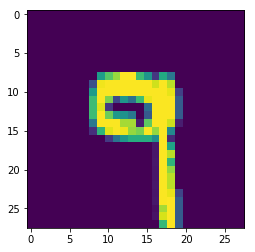

In [20]:
import matplotlib.pyplot as plt
import numpy as np

#B = np.reshape(test_data_list[1], (-1, 28))

test_d = test_data_list[show_output_for_random_instance].split(",")[1:]
test_d = np.array(test_d)
test_d = test_d.astype(np.float)
new_shape = np.reshape(test_d, (28, 28))
#print(new_shape)

from matplotlib import pyplot as plt
plt.imshow(new_shape, interpolation='nearest')
plt.show()

In [13]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print(scorecard_array)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1 1 1 ... 1 1 1]
performance =  0.9457
